In [170]:
import sys
import os
sys.path.append("../src/whole_history_rating")
from whr import whole_history_rating
from whr import utils
from datetime import datetime
import datetime as dt
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

This uses the default main branch of whr. e.g. it will use "black/white" to refer to the winner. "White" is second. 

In [171]:
data_path = '../data/cfbd/games_1990_to_2020.csv'

In [172]:
games_df = pd.read_csv(data_path)
#games_df = games_df[games_df.season>2010]
games_df.shape

(23256, 25)

win_prob with 2.5 home field =  1/(1+10^(2.5/13))
win_prob with 400 elo scale =  1/(1+10^(x/400))

elo handicap for 2.5 points = 2.5/13 * 400 = 77

In [173]:
datetime_from_cfbd = lambda x: datetime.strptime(x,"%Y-%m-%dT%H:%M:%S.%fZ")

In [174]:
whr = whole_history_rating.Base()

In [175]:
start_time = 0
home_team_handicap = 2.5/13*400
for i,row in games_df.iterrows():
    game_time = datetime_from_cfbd(row.start_date)
    if start_time == 0: start_time = game_time
    days = (game_time-start_time).days
    home_team = row.home_team
    away_team = row.away_team
    handicap = -(1-row.neutral_site)*home_team_handicap
    mov = row.home_points-row.away_points
    winner = "W" if mov>0 else "B"
    if mov==0: continue
        
    print("away team: {}, home team: {}".format(away_team,home_team))
    print("winner: {} (W is home), days: {} handicap: {}".format(winner,days,handicap))
    whr.create_game(away_team,home_team,winner, days, handicap)
    #if len(whr.games) > 1000: break

away team: Syracuse, home team: USC
winner: W (W is home), days: 5 handicap: -76.92307692307693
away team: Illinois State, home team: Akron
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: BYU, home team: UTEP
winner: B (W is home), days: 6 handicap: -76.92307692307693
away team: Sonoma State, home team: Cal State Fullerton
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: Long Beach State, home team: Clemson
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: Colorado State, home team: Air Force
winner: B (W is home), days: 6 handicap: -76.92307692307693
away team: Louisiana Tech, home team: East Carolina
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Fresno State
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: Central Michigan, home team: Kentucky
winner: W (W is home), days: 6 handicap: -76.92307692307693
away team: Louisiana, home team: Tulane
wi

away team: Baylor, home team: Texas Tech
winner: B (W is home), days: 34 handicap: -76.92307692307693
away team: Boston College, home team: Navy
winner: B (W is home), days: 34 handicap: -76.92307692307693
away team: California, home team: Arizona
winner: B (W is home), days: 34 handicap: -76.92307692307693
away team: Miami (OH), home team: Central Michigan
winner: W (W is home), days: 34 handicap: -76.92307692307693
away team: Cincinnati, home team: Kent State
winner: B (W is home), days: 34 handicap: -76.92307692307693
away team: Duke, home team: Clemson
winner: W (W is home), days: 34 handicap: -76.92307692307693
away team: Washington, home team: Colorado
winner: W (W is home), days: 34 handicap: -76.92307692307693
away team: Mississippi State, home team: Florida
winner: W (W is home), days: 34 handicap: -76.92307692307693
away team: Virginia Tech, home team: Florida State
winner: W (W is home), days: 34 handicap: -76.92307692307693
away team: Fresno State, home team: Cal State Full

away team: Michigan State, home team: Michigan
winner: B (W is home), days: 48 handicap: -76.92307692307693
away team: Northwestern, home team: Minnesota
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: Ole Miss, home team: Georgia
winner: B (W is home), days: 48 handicap: -76.92307692307693
away team: Akron, home team: Navy
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: Missouri, home team: Nebraska
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: UNLV, home team: New Mexico State
winner: B (W is home), days: 48 handicap: -76.92307692307693
away team: Arkansas State, home team: Northern Illinois
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: Air Force, home team: Notre Dame
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: Arizona, home team: Oregon State
winner: W (W is home), days: 48 handicap: -76.92307692307693
away team: Pacific, home team: Cal State Fullerton
win

away team: Eastern Washington, home team: Houston
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Illinois, home team: Indiana
winner: B (W is home), days: 83 handicap: -76.92307692307693
away team: Purdue, home team: Iowa
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Kent State
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: UNLV, home team: Long Beach State
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Northern Illinois, home team: Louisiana
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Colorado State, home team: Louisiana Tech
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Maryland, home team: Virginia
winner: B (W is home), days: 83 handicap: -76.92307692307693
away team: Boston College, home team: Miami
winner: W (W is home), days: 83 handicap: -76.92307692307693
away team: Minnesota, home team: Michigan

winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: North Texas, home team: Oklahoma
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: Oregon, home team: Texas Tech
winner: B (W is home), days: 384 handicap: -76.92307692307693
away team: Temple, home team: Pittsburgh
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: Rice, home team: Northwestern
winner: B (W is home), days: 384 handicap: -76.92307692307693
away team: Pacific, home team: San Diego State
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: Penn State, home team: USC
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: Syracuse, home team: Maryland
winner: B (W is home), days: 384 handicap: -76.92307692307693
away team: UCLA, home team: Tennessee
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: LSU, home team: Texas A&M
winner: W (W is home), days: 384 handicap: -76.92307692307693
away team: B

away team: Southern Mississippi, home team: Auburn
winner: B (W is home), days: 405 handicap: -76.92307692307693
away team: Rice, home team: Texas
winner: W (W is home), days: 405 handicap: -76.92307692307693
away team: Texas A&M, home team: Texas Tech
winner: B (W is home), days: 405 handicap: -76.92307692307693
away team: Ohio, home team: Toledo
winner: W (W is home), days: 405 handicap: -76.92307692307693
away team: Kansas, home team: Virginia
winner: W (W is home), days: 405 handicap: -76.92307692307693
away team: Virginia Tech, home team: West Virginia
winner: B (W is home), days: 405 handicap: -76.92307692307693
away team: Arizona, home team: Washington
winner: W (W is home), days: 405 handicap: -76.92307692307693
away team: Oregon State, home team: Washington State
winner: W (W is home), days: 405 handicap: -76.92307692307693
away team: Western Michigan, home team: Ball State
winner: B (W is home), days: 405 handicap: -76.92307692307693
away team: Air Force, home team: Navy
winn

winner: B (W is home), days: 426 handicap: -76.92307692307693
away team: Missouri State, home team: Arkansas State
winner: B (W is home), days: 426 handicap: -76.92307692307693
away team: Missouri, home team: Nebraska
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: Illinois, home team: Northwestern
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: USC, home team: Notre Dame
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: Kent State, home team: Ohio
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: Michigan State, home team: Ohio State
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: Kansas, home team: Oklahoma
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: New Mexico State, home team: Pacific
winner: W (W is home), days: 426 handicap: -76.92307692307693
away team: West Virginia, home team: Penn State
winner: W (W is home), days: 426 handicap:

winner: B (W is home), days: 461 handicap: -76.92307692307693
away team: Vanderbilt, home team: Tennessee
winner: W (W is home), days: 461 handicap: -76.92307692307693
away team: Texas Tech, home team: Houston
winner: B (W is home), days: 461 handicap: -76.92307692307693
away team: Tulsa, home team: SMU
winner: B (W is home), days: 461 handicap: -76.92307692307693
away team: Army, home team: Navy
winner: W (W is home), days: 468 handicap: -76.92307692307693
away team: Bowling Green, home team: Fresno State
winner: B (W is home), days: 475 handicap: 0.0
away team: Stanford, home team: Georgia Tech
winner: W (W is home), days: 486 handicap: 0.0
away team: Colorado, home team: Alabama
winner: W (W is home), days: 489 handicap: 0.0
away team: Mississippi State, home team: Air Force
winner: W (W is home), days: 490 handicap: 0.0
away team: Arkansas, home team: Georgia
winner: W (W is home), days: 490 handicap: 0.0
away team: Virginia, home team: Oklahoma
winner: W (W is home), days: 490 han

away team: Miami (OH), home team: Eastern Michigan
winner: B (W is home), days: 769 handicap: -76.92307692307693
away team: Iowa, home team: Michigan
winner: W (W is home), days: 769 handicap: -76.92307692307693
away team: Indiana, home team: Michigan State
winner: W (W is home), days: 769 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Northern Illinois
winner: B (W is home), days: 769 handicap: -76.92307692307693
away team: Illinois, home team: Minnesota
winner: W (W is home), days: 769 handicap: -76.92307692307693
away team: Kentucky, home team: Ole Miss
winner: W (W is home), days: 769 handicap: -76.92307692307693
away team: Marshall, home team: Missouri
winner: W (W is home), days: 769 handicap: -76.92307692307693
away team: Nevada, home team: Cal State Fullerton
winner: B (W is home), days: 769 handicap: -76.92307692307693
away team: UNLV, home team: Pacific
winner: B (W is home), days: 769 handicap: -76.92307692307693
away team: Navy, home team: North Caroli

away team: Bowling Green, home team: Akron
winner: B (W is home), days: 790 handicap: -76.92307692307693
away team: Kansas State, home team: Colorado
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: Navy, home team: Delaware
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: East Carolina, home team: Pittsburgh
winner: B (W is home), days: 790 handicap: -76.92307692307693
away team: Ohio, home team: Eastern Michigan
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: Louisville, home team: Florida
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: New Mexico, home team: Fresno State
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: Georgia, home team: Kentucky
winner: B (W is home), days: 790 handicap: -76.92307692307693
away team: UNLV, home team: Hawai'i
winner: W (W is home), days: 790 handicap: -76.92307692307693
away team: Wisconsin, home team: Indiana
winner: W (W is ho

away team: Texas, home team: Baylor
winner: W (W is home), days: 818 handicap: -76.92307692307693
away team: Boston College, home team: Army
winner: B (W is home), days: 818 handicap: -76.92307692307693
away team: BYU, home team: Utah
winner: B (W is home), days: 818 handicap: -76.92307692307693
away team: Iowa State, home team: Colorado
winner: W (W is home), days: 818 handicap: -76.92307692307693
away team: Colorado State, home team: New Mexico
winner: B (W is home), days: 818 handicap: -76.92307692307693
away team: Florida, home team: Vanderbilt
winner: B (W is home), days: 818 handicap: -76.92307692307693
away team: Fresno State, home team: San Diego State
winner: B (W is home), days: 818 handicap: -76.92307692307693
away team: Wyoming, home team: Hawai'i
winner: W (W is home), days: 818 handicap: -76.92307692307693
away team: Michigan State, home team: Illinois
winner: W (W is home), days: 818 handicap: -76.92307692307693
away team: Oklahoma State, home team: Kansas State
winner: 

away team: Missouri, home team: Texas A&M
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: Southern Illinois, home team: Toledo
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: William & Mary, home team: Tulane
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: Utah, home team: Kansas
winner: B (W is home), days: 1119 handicap: -76.92307692307693
away team: Appalachian State, home team: Wake Forest
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: Oregon State, home team: Washington State
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: West Virginia, home team: Maryland
winner: B (W is home), days: 1119 handicap: -76.92307692307693
away team: Akron, home team: Western Michigan
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: Iowa State, home team: Wisconsin
winner: W (W is home), days: 1119 handicap: -76.92307692307693
away team: Wyoming, h

away team: Stanford, home team: Arizona
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Florida, home team: Auburn
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Akron, home team: Bowling Green
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Ball State, home team: Cincinnati
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Colorado, home team: Oklahoma
winner: B (W is home), days: 1147 handicap: -76.92307692307693
away team: Louisiana Tech, home team: East Carolina
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Central Michigan
winner: B (W is home), days: 1147 handicap: -76.92307692307693
away team: Virginia, home team: Florida State
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Air Force, home team: Fresno State
winner: W (W is home), days: 1147 handicap: -76.92307692307693
away team: Georgia, home 

away team: Michigan, home team: Minnesota
winner: B (W is home), days: 1175 handicap: -76.92307692307693
away team: Michigan State, home team: Purdue
winner: B (W is home), days: 1175 handicap: -76.92307692307693
away team: Northern Illinois, home team: Ole Miss
winner: W (W is home), days: 1175 handicap: -76.92307692307693
away team: Iowa State, home team: Nebraska
winner: W (W is home), days: 1175 handicap: -76.92307692307693
away team: Nevada, home team: New Mexico State
winner: B (W is home), days: 1175 handicap: -76.92307692307693
away team: UNLV, home team: San José State
winner: B (W is home), days: 1175 handicap: -76.92307692307693
away team: Wyoming, home team: New Mexico
winner: W (W is home), days: 1175 handicap: -76.92307692307693
away team: North Carolina, home team: Tulane
winner: B (W is home), days: 1175 handicap: -76.92307692307693
away team: Maryland, home team: NC State
winner: W (W is home), days: 1175 handicap: -76.92307692307693
away team: Florida State, home team

away team: Indiana State, home team: Toledo
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Tulsa, home team: Missouri
winner: B (W is home), days: 1469 handicap: -76.92307692307693
away team: Tennessee, home team: UCLA
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Utah, home team: Utah State
winner: B (W is home), days: 1469 handicap: -76.92307692307693
away team: Wake Forest, home team: Vanderbilt
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Arkansas State, home team: Virginia Tech
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Ball State, home team: West Virginia
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Western Michigan, home team: Miami (OH)
winner: B (W is home), days: 1469 handicap: -76.92307692307693
away team: UTEP, home team: Wyoming
winner: W (W is home), days: 1469 handicap: -76.92307692307693
away team: Nebraska, home team: Texas Tec

winner: B (W is home), days: 1497 handicap: -76.92307692307693
away team: Southern Mississippi, home team: East Carolina
winner: W (W is home), days: 1497 handicap: -76.92307692307693
away team: Florida, home team: Ole Miss
winner: B (W is home), days: 1497 handicap: -76.92307692307693
away team: Minnesota, home team: Indiana
winner: W (W is home), days: 1497 handicap: -76.92307692307693
away team: Louisiana, home team: Louisiana Tech
winner: B (W is home), days: 1497 handicap: -76.92307692307693
away team: Weber State, home team: Louisiana Monroe
winner: W (W is home), days: 1497 handicap: -76.92307692307693
away team: Pittsburgh, home team: Louisville
winner: W (W is home), days: 1497 handicap: -76.92307692307693
away team: Miami, home team: Rutgers
winner: B (W is home), days: 1497 handicap: -76.92307692307693
away team: Miami (OH), home team: Eastern Michigan
winner: B (W is home), days: 1497 handicap: -76.92307692307693
away team: Michigan, home team: Iowa
winner: B (W is home), d

away team: Eastern Michigan, home team: Ball State
winner: B (W is home), days: 1525 handicap: -76.92307692307693
away team: Georgia, home team: Florida
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Duke, home team: Florida State
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Illinois, home team: Northwestern
winner: B (W is home), days: 1525 handicap: -76.92307692307693
away team: Oklahoma State, home team: Kansas
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Kansas State, home team: Oklahoma
winner: B (W is home), days: 1525 handicap: -76.92307692307693
away team: Memphis, home team: Louisville
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Tulane, home team: Maryland
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Virginia Tech, home team: Miami
winner: W (W is home), days: 1525 handicap: -76.92307692307693
away team: Indiana, home team: Michigan St

away team: Michigan State, home team: Penn State
winner: W (W is home), days: 1553 handicap: -76.92307692307693
away team: Rice, home team: Houston
winner: B (W is home), days: 1553 handicap: -76.92307692307693
away team: Tennessee, home team: Vanderbilt
winner: B (W is home), days: 1553 handicap: -76.92307692307693
away team: Air Force, home team: Hawai'i
winner: B (W is home), days: 1560 handicap: -76.92307692307693
away team: Navy, home team: Army
winner: W (W is home), days: 1560 handicap: -76.92307692307693
away team: Alabama, home team: Florida
winner: W (W is home), days: 1560 handicap: 0.0
away team: Central Michigan, home team: UNLV
winner: W (W is home), days: 1572 handicap: 0.0
away team: Kansas State, home team: Boston College
winner: W (W is home), days: 1582 handicap: 0.0
away team: Arizona, home team: Utah
winner: W (W is home), days: 1584 handicap: 0.0
away team: TCU, home team: Virginia
winner: W (W is home), days: 1585 handicap: 0.0
away team: Oklahoma, home team: BYU

away team: Texas A&M, home team: Colorado
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: Ohio, home team: Eastern Michigan
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: UCF, home team: Florida State
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: UTEP, home team: Hawai'i
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: East Carolina, home team: Illinois
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Indiana
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: UNLV, home team: Iowa State
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: Houston, home team: Kansas
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: Akron, home team: Kansas State
winner: W (W is home), days: 1854 handicap: -76.92307692307693
away team: Kentucky, home team: South Carolina
winne

away team: Troy, home team: Louisiana Monroe
winner: B (W is home), days: 1868 handicap: -76.92307692307693
away team: Wyoming, home team: Tulsa
winner: W (W is home), days: 1868 handicap: -76.92307692307693
away team: Virginia Tech, home team: Navy
winner: B (W is home), days: 1868 handicap: -76.92307692307693
away team: Oregon State, home team: Washington State
winner: W (W is home), days: 1868 handicap: -76.92307692307693
away team: Akron, home team: Western Michigan
winner: W (W is home), days: 1868 handicap: -76.92307692307693
away team: Air Force, home team: Navy
winner: B (W is home), days: 1875 handicap: -76.92307692307693
away team: UAB, home team: North Texas
winner: B (W is home), days: 1875 handicap: -76.92307692307693
away team: BYU, home team: Arizona State
winner: W (W is home), days: 1875 handicap: -76.92307692307693
away team: Ole Miss, home team: Arkansas
winner: W (W is home), days: 1875 handicap: -76.92307692307693
away team: Bowling Green, home team: Ball State
win

away team: Army, home team: Air Force
winner: W (W is home), days: 1903 handicap: -76.92307692307693
away team: Mississippi State, home team: Alabama
winner: W (W is home), days: 1903 handicap: -76.92307692307693
away team: Arizona State, home team: California
winner: B (W is home), days: 1903 handicap: -76.92307692307693
away team: Louisiana, home team: Arkansas
winner: W (W is home), days: 1903 handicap: -76.92307692307693
away team: Arkansas State, home team: Northern Illinois
winner: B (W is home), days: 1903 handicap: -76.92307692307693
away team: Auburn, home team: Georgia
winner: B (W is home), days: 1903 handicap: -76.92307692307693
away team: Central Michigan, home team: Ball State
winner: W (W is home), days: 1903 handicap: -76.92307692307693
away team: Baylor, home team: SMU
winner: B (W is home), days: 1903 handicap: -76.92307692307693
away team: Bowling Green, home team: Kent State
winner: B (W is home), days: 1903 handicap: -76.92307692307693
away team: BYU, home team: Ne

away team: Baylor, home team: Louisiana Tech
winner: B (W is home), days: 2204 handicap: -76.92307692307693
away team: Portland State, home team: Boise State
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: California, home team: San José State
winner: B (W is home), days: 2204 handicap: -76.92307692307693
away team: Kentucky, home team: Cincinnati
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: Furman, home team: Clemson
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: Colorado, home team: Colorado State
winner: B (W is home), days: 2204 handicap: -76.92307692307693
away team: East Tennessee State, home team: East Carolina
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: Georgia Southern, home team: Florida
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: Duke, home team: Florida State
winner: W (W is home), days: 2204 handicap: -76.92307692307693
away team: Ge

away team: New Mexico State, home team: LSU
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: Pittsburgh, home team: Miami
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: UCLA, home team: Michigan
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Michigan State
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: Mississippi State, home team: South Carolina
winner: B (W is home), days: 2225 handicap: -76.92307692307693
away team: Colorado State, home team: Nebraska
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: Kent State, home team: Nevada
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: TCU, home team: New Mexico
winner: W (W is home), days: 2225 handicap: -76.92307692307693
away team: Northwestern, home team: Indiana
winner: B (W is home), days: 2225 handicap: -76.92307692307693
away team: Northwestern State, 

away team: Auburn, home team: Florida
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: Vanderbilt, home team: Georgia
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: UNLV, home team: Hawai'i
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: Nevada, home team: Idaho
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: Iowa, home team: Penn State
winner: B (W is home), days: 2246 handicap: -76.92307692307693
away team: Kansas State, home team: Texas A&M
winner: B (W is home), days: 2246 handicap: -76.92307692307693
away team: Kentucky, home team: LSU
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: Toledo, home team: Louisiana Tech
winner: W (W is home), days: 2246 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: UCF
winner: B (W is home), days: 2246 handicap: -76.92307692307693
away team: Northern Illinois, home team: Louisville
winner: W (W is hom

away team: Ohio State, home team: Indiana
winner: B (W is home), days: 2274 handicap: -76.92307692307693
away team: California, home team: Oregon
winner: W (W is home), days: 2274 handicap: -76.92307692307693
away team: Northern Illinois, home team: Oregon State
winner: W (W is home), days: 2274 handicap: -76.92307692307693
away team: Penn State, home team: Michigan
winner: B (W is home), days: 2274 handicap: -76.92307692307693
away team: Rice, home team: TCU
winner: B (W is home), days: 2274 handicap: -76.92307692307693
away team: Washington State, home team: Stanford
winner: W (W is home), days: 2274 handicap: -76.92307692307693
away team: Army, home team: Syracuse
winner: W (W is home), days: 2274 handicap: -76.92307692307693
away team: Arkansas, home team: Tennessee
winner: W (W is home), days: 2274 handicap: -76.92307692307693
away team: Texas, home team: Kansas
winner: B (W is home), days: 2274 handicap: -76.92307692307693
away team: Oklahoma, home team: Texas A&M
winner: W (W is

away team: Missouri, home team: Kansas
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Ohio, home team: Kansas State
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: LSU, home team: Mississippi State
winner: B (W is home), days: 2575 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Louisiana Tech
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Illinois, home team: Louisville
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Marshall, home team: Kent State
winner: B (W is home), days: 2575 handicap: -76.92307692307693
away team: Akron, home team: Miami (OH)
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Colorado, home team: Michigan
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Memphis, home team: Michigan State
winner: W (W is home), days: 2575 handicap: -76.92307692307693
away team: Iowa State, home team: Minnes

away team: West Virginia, home team: Maryland
winner: B (W is home), days: 2603 handicap: -76.92307692307693
away team: Western Michigan, home team: Bowling Green
winner: B (W is home), days: 2603 handicap: -76.92307692307693
away team: Illinois, home team: Wisconsin
winner: W (W is home), days: 2603 handicap: -76.92307692307693
away team: Wyoming, home team: Nevada
winner: B (W is home), days: 2603 handicap: -76.92307692307693
away team: Arizona State, home team: Stanford
winner: B (W is home), days: 2610 handicap: -76.92307692307693
away team: Rutgers, home team: Army
winner: W (W is home), days: 2610 handicap: -76.92307692307693
away team: Central Michigan, home team: Ball State
winner: W (W is home), days: 2610 handicap: -76.92307692307693
away team: Boise State, home team: North Texas
winner: B (W is home), days: 2610 handicap: -76.92307692307693
away team: Hawai'i, home team: BYU
winner: W (W is home), days: 2610 handicap: -76.92307692307693
away team: Kansas, home team: Colorado

winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Alabama, home team: Auburn
winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Boise State, home team: Idaho
winner: B (W is home), days: 2645 handicap: -76.92307692307693
away team: Army, home team: Boston College
winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Toledo, home team: UCF
winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Clemson, home team: South Carolina
winner: B (W is home), days: 2645 handicap: -76.92307692307693
away team: Colorado State, home team: San Diego State
winner: B (W is home), days: 2645 handicap: -76.92307692307693
away team: Florida State, home team: Florida
winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Wyoming, home team: Fresno State
winner: W (W is home), days: 2645 handicap: -76.92307692307693
away team: Georgia, home team: Ole Miss
winner: B (W is home), days: 2645 handicap: -76.

away team: North Carolina, home team: Stanford
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Rutgers, home team: Syracuse
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Florida, home team: Tennessee
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Texas A&M, home team: Southern Mississippi
winner: B (W is home), days: 2946 handicap: -76.92307692307693
away team: Fresno State, home team: Texas Tech
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Western Michigan, home team: Toledo
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: UCLA, home team: Houston
winner: B (W is home), days: 2946 handicap: -76.92307692307693
away team: Hawai'i, home team: Utah
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Clemson, home team: Virginia
winner: W (W is home), days: 2946 handicap: -76.92307692307693
away team: Virginia Tech, home team: Miami
wi

winner: W (W is home), days: 2974 handicap: -76.92307692307693
away team: Purdue, home team: Penn State
winner: W (W is home), days: 2974 handicap: -76.92307692307693
away team: Tulsa, home team: Rice
winner: W (W is home), days: 2974 handicap: -76.92307692307693
away team: Rutgers, home team: Pittsburgh
winner: B (W is home), days: 2974 handicap: -76.92307692307693
away team: San Diego State, home team: New Mexico
winner: B (W is home), days: 2974 handicap: -76.92307692307693
away team: USC, home team: Washington State
winner: B (W is home), days: 2974 handicap: -76.92307692307693
away team: TCU, home team: SMU
winner: W (W is home), days: 2974 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Army
winner: B (W is home), days: 2974 handicap: -76.92307692307693
away team: Syracuse, home team: Boston College
winner: B (W is home), days: 2974 handicap: -76.92307692307693
away team: Temple, home team: Virginia Tech
winner: B (W is home), days: 2974 handicap: -76.923

away team: UT Martin, home team: UAB
winner: W (W is home), days: 3009 handicap: -76.92307692307693
away team: Bowling Green, home team: Northern Illinois
winner: B (W is home), days: 3009 handicap: -76.92307692307693
away team: BYU, home team: Utah
winner: B (W is home), days: 3009 handicap: -76.92307692307693
away team: New Mexico, home team: UCF
winner: W (W is home), days: 3009 handicap: -76.92307692307693
away team: Ball State, home team: Central Michigan
winner: W (W is home), days: 3009 handicap: -76.92307692307693
away team: Cincinnati, home team: Arkansas State
winner: B (W is home), days: 3009 handicap: -76.92307692307693
away team: South Carolina, home team: Clemson
winner: W (W is home), days: 3009 handicap: -76.92307692307693
away team: East Carolina, home team: Memphis
winner: B (W is home), days: 3009 handicap: -76.92307692307693
away team: Toledo, home team: Eastern Michigan
winner: W (W is home), days: 3009 handicap: -76.92307692307693
away team: Florida, home team: Fl

away team: Bowling Green, home team: Marshall
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: West Virginia, home team: Maryland
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: Arkansas State, home team: Memphis
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Miami (OH)
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: Michigan, home team: Syracuse
winner: B (W is home), days: 3310 handicap: -76.92307692307693
away team: Michigan State, home team: Notre Dame
winner: B (W is home), days: 3310 handicap: -76.92307692307693
away team: Wofford, home team: Middle Tennessee
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: Illinois State, home team: Minnesota
winner: W (W is home), days: 3310 handicap: -76.92307692307693
away team: Oklahoma State, home team: Mississippi State
winner: W (W is home), days: 3310 handicap: -76.92307692307693
aw

away team: Boston College, home team: Temple
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Georgia, home team: Tennessee
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Oklahoma, home team: Texas
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Baylor, home team: Texas A&M
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: San José State, home team: TCU
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: SMU, home team: UTEP
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Kent State, home team: Toledo
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Oregon, home team: UCLA
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Utah
winner: W (W is home), days: 3331 handicap: -76.92307692307693
away team: Arkansas State, home team: Utah State
winner: W (W is home), da

winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: Washington State, home team: Oregon
winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: California, home team: Oregon State
winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Memphis
winner: B (W is home), days: 3359 handicap: -76.92307692307693
away team: Temple, home team: Syracuse
winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: Notre Dame, home team: Tennessee
winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: Texas, home team: Oklahoma State
winner: B (W is home), days: 3359 handicap: -76.92307692307693
away team: Iowa State, home team: Texas Tech
winner: W (W is home), days: 3359 handicap: -76.92307692307693
away team: Toledo, home team: Central Michigan
winner: B (W is home), days: 3359 handicap: -76.92307692307693
away team: Tulsa, home team: UTEP
winner: B (W is home), days: 3359 

winner: B (W is home), days: 3660 handicap: -76.92307692307693
away team: Western Illinois, home team: Missouri
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: San José State, home team: Nebraska
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Tulsa, home team: North Carolina
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Arkansas State, home team: NC State
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Texas A&M, home team: Notre Dame
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Fresno State, home team: Ohio State
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: UTEP, home team: Oklahoma
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Nevada, home team: Oregon
winner: W (W is home), days: 3660 handicap: -76.92307692307693
away team: Eastern Washington, home team: Oregon State
winner: W (W is home), day

winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: Rice, home team: Oklahoma
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: UCLA, home team: Oregon
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: San Diego State, home team: Oregon State
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: Rutgers, home team: Pittsburgh
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: Minnesota, home team: Purdue
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: Mississippi State, home team: South Carolina
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: San José State, home team: USC
winner: W (W is home), days: 3681 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Oklahoma State
winner: B (W is home), days: 3681 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Temple
winner: W (W is home), 

winner: B (W is home), days: 3702 handicap: -76.92307692307693
away team: Ole Miss, home team: Alabama
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Memphis, home team: UAB
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Washington State, home team: Arizona
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Ball State
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Eastern Washington, home team: Boise State
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Syracuse, home team: Boston College
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: UCLA, home team: California
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Eastern Kentucky, home team: UCF
winner: W (W is home), days: 3702 handicap: -76.92307692307693
away team: Maryland, home team: Clemson
winner: W (W is home), days: 3702 h

winner: B (W is home), days: 3723 handicap: -76.92307692307693
away team: UAB, home team: Cincinnati
winner: W (W is home), days: 3723 handicap: -76.92307692307693
away team: Colorado, home team: Missouri
winner: B (W is home), days: 3723 handicap: -76.92307692307693
away team: Central Michigan, home team: Eastern Michigan
winner: W (W is home), days: 3723 handicap: -76.92307692307693
away team: Florida, home team: Vanderbilt
winner: B (W is home), days: 3723 handicap: -76.92307692307693
away team: Clemson, home team: Florida State
winner: W (W is home), days: 3723 handicap: -76.92307692307693
away team: Hawai'i, home team: Fresno State
winner: W (W is home), days: 3723 handicap: -76.92307692307693
away team: Idaho, home team: North Texas
winner: B (W is home), days: 3723 handicap: -76.92307692307693
away team: Indiana, home team: Illinois
winner: W (W is home), days: 3723 handicap: -76.92307692307693
away team: Iowa, home team: Penn State
winner: B (W is home), days: 3723 handicap: -7

winner: B (W is home), days: 4022 handicap: -76.92307692307693
away team: UNLV, home team: Arkansas
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Eastern Kentucky, home team: Central Michigan
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Illinois State, home team: Western Michigan
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: South Florida, home team: Northern Illinois
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Indiana State, home team: Tulsa
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Montana State, home team: UAB
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Vanderbilt
winner: B (W is home), days: 4022 handicap: -76.92307692307693
away team: Idaho, home team: Washington State
winner: W (W is home), days: 4022 handicap: -76.92307692307693
away team: Arizona, home team: San Diego State
w

away team: Northern Illinois, home team: Toledo
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away team: North Texas, home team: South Florida
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away team: Connecticut, home team: Rutgers
winner: B (W is home), days: 4052 handicap: -76.92307692307693
away team: Auburn, home team: Vanderbilt
winner: B (W is home), days: 4052 handicap: -76.92307692307693
away team: Bowling Green, home team: Marshall
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away team: New Mexico State, home team: Louisiana Monroe
winner: B (W is home), days: 4052 handicap: -76.92307692307693
away team: UAB, home team: Southern Mississippi
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away team: LSU, home team: Tennessee
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away team: Northwestern State, home team: Oklahoma State
winner: W (W is home), days: 4052 handicap: -76.92307692307693
away te

away team: Tulane, home team: Army
winner: W (W is home), days: 4080 handicap: -76.92307692307693
away team: Northern Illinois, home team: Central Michigan
winner: B (W is home), days: 4080 handicap: -76.92307692307693
away team: Ball State, home team: Connecticut
winner: B (W is home), days: 4080 handicap: -76.92307692307693
away team: Virginia, home team: NC State
winner: W (W is home), days: 4080 handicap: -76.92307692307693
away team: Louisville, home team: Cincinnati
winner: B (W is home), days: 4080 handicap: -76.92307692307693
away team: UAB, home team: Memphis
winner: B (W is home), days: 4080 handicap: -76.92307692307693
away team: Iowa State, home team: Texas A&M
winner: W (W is home), days: 4080 handicap: -76.92307692307693
away team: Texas, home team: Missouri
winner: B (W is home), days: 4080 handicap: -76.92307692307693
away team: Rice, home team: Louisiana Tech
winner: W (W is home), days: 4080 handicap: -76.92307692307693
away team: Western Michigan, home team: Miami (O

away team: Washington State, home team: Washington
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Syracuse, home team: Miami
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Northern Arizona, home team: Oregon State
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: UCLA, home team: USC
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Toledo
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Utah, home team: BYU
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Maryland, home team: NC State
winner: B (W is home), days: 4101 handicap: -76.92307692307693
away team: UTEP, home team: Rice
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: Florida State, home team: Florida
winner: W (W is home), days: 4101 handicap: -76.92307692307693
away team: UAB, home team: Houston
winner: B (W is home), day

away team: Miami, home team: Florida
winner: B (W is home), days: 4395 handicap: -76.92307692307693
away team: Toledo, home team: Eastern Michigan
winner: B (W is home), days: 4395 handicap: -76.92307692307693
away team: Akron, home team: Maryland
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: New Mexico State, home team: California
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: East Carolina, home team: Wake Forest
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: Tennessee Tech, home team: Iowa State
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: San Diego State, home team: Colorado
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: Utah State, home team: Nebraska
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Tennessee
winner: W (W is home), days: 4395 handicap: -76.92307692307693
away team: Tulsa, hom

away team: Oregon State, home team: USC
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: Virginia, home team: Wake Forest
winner: B (W is home), days: 4416 handicap: -76.92307692307693
away team: South Florida, home team: Oklahoma
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: Rutgers, home team: Tennessee
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Texas A&M
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: Memphis, home team: UAB
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: South Carolina, home team: Vanderbilt
winner: B (W is home), days: 4416 handicap: -76.92307692307693
away team: Buffalo, home team: Ohio
winner: W (W is home), days: 4416 handicap: -76.92307692307693
away team: Kansas, home team: Tulsa
winner: B (W is home), days: 4416 handicap: -76.92307692307693
away team: Southeast Missouri State, home team: Middle Ten

away team: Hawai'i, home team: Fresno State
winner: B (W is home), days: 4443 handicap: -76.92307692307693
away team: Notre Dame, home team: Florida State
winner: B (W is home), days: 4444 handicap: -76.92307692307693
away team: Miami, home team: West Virginia
winner: B (W is home), days: 4444 handicap: -76.92307692307693
away team: Purdue, home team: Northwestern
winner: B (W is home), days: 4444 handicap: -76.92307692307693
away team: North Carolina, home team: Wake Forest
winner: W (W is home), days: 4444 handicap: -76.92307692307693
away team: Boston College, home team: Pittsburgh
winner: W (W is home), days: 4444 handicap: -76.92307692307693
away team: Iowa, home team: Michigan
winner: B (W is home), days: 4444 handicap: -76.92307692307693
away team: LSU, home team: Auburn
winner: W (W is home), days: 4444 handicap: -76.92307692307693
away team: Marshall, home team: Central Michigan
winner: B (W is home), days: 4444 handicap: -76.92307692307693
away team: UAB, home team: Army
winn

away team: Washington, home team: Oregon
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: Arizona, home team: California
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Middle Tennessee
winner: W (W is home), days: 4465 handicap: -76.92307692307693
away team: Army, home team: Tulane
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: Toledo, home team: Western Michigan
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: New Mexico State, home team: North Texas
winner: W (W is home), days: 4465 handicap: -76.92307692307693
away team: Arkansas State, home team: Idaho
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: Oregon State, home team: Stanford
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: SMU, home team: UTEP
winner: B (W is home), days: 4465 handicap: -76.92307692307693
away team: Kent State, home team: UCF


away team: Northwestern, home team: Kansas
winner: B (W is home), days: 4752 handicap: -76.92307692307693
away team: Troy, home team: Kansas State
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Colorado, home team: Colorado State
winner: B (W is home), days: 4752 handicap: -76.92307692307693
away team: South Florida, home team: Alabama
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Arkansas State, home team: Texas A&M
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Rice, home team: Houston
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Tennessee Tech, home team: Memphis
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Florida State, home team: North Carolina
winner: B (W is home), days: 4752 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: LSU
winner: W (W is home), days: 4752 handicap: -76.92307692307693
away team: Texas State, home te

away team: Texas, home team: Rice
winner: B (W is home), days: 4773 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Fresno State
winner: W (W is home), days: 4773 handicap: -76.92307692307693
away team: Nebraska, home team: Southern Mississippi
winner: B (W is home), days: 4778 handicap: -76.92307692307693
away team: Connecticut, home team: Virginia Tech
winner: W (W is home), days: 4780 handicap: -76.92307692307693
away team: Minnesota, home team: Penn State
winner: B (W is home), days: 4780 handicap: -76.92307692307693
away team: Indiana, home team: Michigan
winner: W (W is home), days: 4780 handicap: -76.92307692307693
away team: Northwestern, home team: Ohio State
winner: W (W is home), days: 4780 handicap: -76.92307692307693
away team: Iowa, home team: Michigan State
winner: W (W is home), days: 4780 handicap: -76.92307692307693
away team: Florida, home team: Kentucky
winner: B (W is home), days: 4780 handicap: -76.92307692307693
away team: Missouri, home team: 

away team: Ohio State, home team: Indiana
winner: B (W is home), days: 4808 handicap: -76.92307692307693
away team: Penn State, home team: Iowa
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Wisconsin, home team: Northwestern
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Minnesota, home team: Illinois
winner: B (W is home), days: 4808 handicap: -76.92307692307693
away team: North Carolina, home team: Clemson
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Syracuse, home team: Pittsburgh
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Akron, home team: Connecticut
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Texas Tech, home team: Missouri
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Mississippi State, home team: Kentucky
winner: W (W is home), days: 4808 handicap: -76.92307692307693
away team: Iowa State, home team: Nebrask

away team: UTEP, home team: Boise State
winner: W (W is home), days: 4829 handicap: -76.92307692307693
away team: Oregon, home team: UCLA
winner: B (W is home), days: 4829 handicap: -76.92307692307693
away team: NC State, home team: Florida State
winner: W (W is home), days: 4829 handicap: -76.92307692307693
away team: Michigan, home team: Northwestern
winner: B (W is home), days: 4829 handicap: -76.92307692307693
away team: Auburn, home team: Georgia
winner: W (W is home), days: 4829 handicap: -76.92307692307693
away team: Kansas State, home team: Nebraska
winner: B (W is home), days: 4829 handicap: -76.92307692307693
away team: Purdue, home team: Ohio State
winner: W (W is home), days: 4829 handicap: -76.92307692307693
away team: Arizona State, home team: Washington State
winner: W (W is home), days: 4829 handicap: -76.92307692307693
away team: Connecticut, home team: Wake Forest
winner: B (W is home), days: 4829 handicap: -76.92307692307693
away team: Boston College, home team: Rutg

away team: Missouri, home team: Troy
winner: W (W is home), days: 5128 handicap: -76.92307692307693
away team: Florida State, home team: Miami
winner: W (W is home), days: 5129 handicap: -76.92307692307693
away team: Oregon State, home team: Boise State
winner: W (W is home), days: 5129 handicap: -76.92307692307693
away team: Florida International, home team: Youngstown State
winner: B (W is home), days: 5130 handicap: -76.92307692307693
away team: Iowa State, home team: Iowa
winner: W (W is home), days: 5130 handicap: -76.92307692307693
away team: UCLA, home team: Illinois
winner: B (W is home), days: 5130 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Nebraska
winner: B (W is home), days: 5130 handicap: -76.92307692307693
away team: Central Michigan, home team: Michigan State
winner: W (W is home), days: 5130 handicap: -76.92307692307693
away team: Duke, home team: Connecticut
winner: W (W is home), days: 5130 handicap: -76.92307692307693
away team: Arizona 

away team: Middle Tennessee, home team: North Texas
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Kansas, home team: Nebraska
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Auburn, home team: Tennessee
winner: B (W is home), days: 5151 handicap: -76.92307692307693
away team: SMU, home team: Boise State
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Penn State, home team: Minnesota
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Ohio State, home team: Northwestern
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Rice, home team: San José State
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: New Mexico State, home team: UTEP
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: Nevada, home team: UNLV
winner: W (W is home), days: 5151 handicap: -76.92307692307693
away team: BYU, home team: Colorado State
winner:

away team: Purdue, home team: Northwestern
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Iowa, home team: Illinois
winner: B (W is home), days: 5179 handicap: -76.92307692307693
away team: Duke, home team: Wake Forest
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Missouri, home team: Nebraska
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: NC State, home team: Clemson
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Penn State, home team: Ohio State
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Tennessee, home team: South Carolina
winner: B (W is home), days: 5179 handicap: -76.92307692307693
away team: Western Michigan, home team: Central Michigan
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Connecticut, home team: Syracuse
winner: W (W is home), days: 5179 handicap: -76.92307692307693
away team: Delaware, home team: Navy
w

winner: B (W is home), days: 5200 handicap: -76.92307692307693
away team: South Florida, home team: Cincinnati
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: Wisconsin, home team: Iowa
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: Western Michigan, home team: Marshall
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: Louisville, home team: Houston
winner: B (W is home), days: 5200 handicap: -76.92307692307693
away team: SMU, home team: UTEP
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: Miami (OH), home team: Akron
winner: B (W is home), days: 5200 handicap: -76.92307692307693
away team: Washington, home team: Washington State
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Troy
winner: W (W is home), days: 5200 handicap: -76.92307692307693
away team: BYU, home team: Utah
winner: W (W is home), days: 5200 handicap: -76.92307692

away team: North Carolina, home team: Georgia Tech
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Villanova, home team: Rutgers
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Hawai'i, home team: Michigan State
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Iowa, home team: Iowa State
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Buffalo, home team: Syracuse
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Montana, home team: Oregon
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: California, home team: Washington
winner: B (W is home), days: 5494 handicap: -76.92307692307693
away team: Southeast Missouri State, home team: Kent State
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Northern Illinois, home team: Northwestern
winner: W (W is home), days: 5494 handicap: -76.92307692307693
away team: Nicholls,

away team: Virginia, home team: Boston College
winner: W (W is home), days: 5522 handicap: -76.92307692307693
away team: Central Michigan, home team: Army
winner: B (W is home), days: 5522 handicap: -76.92307692307693
away team: Kentucky, home team: South Carolina
winner: W (W is home), days: 5522 handicap: -76.92307692307693
away team: Oklahoma, home team: Texas
winner: W (W is home), days: 5522 handicap: -76.92307692307693
away team: Maryland, home team: Temple
winner: B (W is home), days: 5522 handicap: -76.92307692307693
away team: Minnesota, home team: Michigan
winner: B (W is home), days: 5522 handicap: -76.92307692307693
away team: Air Force, home team: Navy
winner: W (W is home), days: 5522 handicap: -76.92307692307693
away team: Akron, home team: Buffalo
winner: B (W is home), days: 5522 handicap: -76.92307692307693
away team: Baylor, home team: Iowa State
winner: B (W is home), days: 5522 handicap: -76.92307692307693
away team: The Citadel, home team: Ole Miss
winner: W (W is

winner: W (W is home), days: 5550 handicap: -76.92307692307693
away team: Michigan State, home team: Purdue
winner: W (W is home), days: 5550 handicap: -76.92307692307693
away team: South Carolina, home team: Arkansas
winner: B (W is home), days: 5550 handicap: -76.92307692307693
away team: Texas, home team: Baylor
winner: B (W is home), days: 5550 handicap: -76.92307692307693
away team: Auburn, home team: Kentucky
winner: B (W is home), days: 5550 handicap: -76.92307692307693
away team: Nebraska, home team: Kansas
winner: W (W is home), days: 5550 handicap: -76.92307692307693
away team: Western Michigan, home team: Eastern Michigan
winner: B (W is home), days: 5550 handicap: -76.92307692307693
away team: Northern Illinois, home team: Central Michigan
winner: B (W is home), days: 5550 handicap: -76.92307692307693
away team: Duke, home team: Clemson
winner: W (W is home), days: 5550 handicap: -76.92307692307693
away team: Tulane, home team: Navy
winner: W (W is home), days: 5550 handica

away team: LSU, home team: Alabama
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: USC, home team: California
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: Miami, home team: Wake Forest
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: UCF, home team: UAB
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: Nevada, home team: New Mexico State
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Idaho
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: Washington, home team: Arizona
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: BYU, home team: Wyoming
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: Ball State, home team: Eastern Michigan
winner: B (W is home), days: 5557 handicap: -76.92307692307693
away team: New Mexico, home team: Utah
winner: B (W is home), days: 5

away team: Clemson, home team: Colorado
winner: B (W is home), days: 5602 handicap: -76.92307692307693
away team: Arizona State, home team: Rutgers
winner: B (W is home), days: 5602 handicap: -76.92307692307693
away team: Boise State, home team: Boston College
winner: W (W is home), days: 5603 handicap: -76.92307692307693
away team: Michigan, home team: Nebraska
winner: W (W is home), days: 5603 handicap: -76.92307692307693
away team: Georgia Tech, home team: Utah
winner: W (W is home), days: 5604 handicap: -76.92307692307693
away team: Oregon, home team: Oklahoma
winner: W (W is home), days: 5604 handicap: -76.92307692307693
away team: Virginia, home team: Minnesota
winner: B (W is home), days: 5605 handicap: -76.92307692307693
away team: Northwestern, home team: UCLA
winner: W (W is home), days: 5605 handicap: -76.92307692307693
away team: South Carolina, home team: Missouri
winner: W (W is home), days: 5605 handicap: -76.92307692307693
away team: Miami, home team: LSU
winner: W (W i

away team: Portland State, home team: New Mexico
winner: B (W is home), days: 5851 handicap: -76.92307692307693
away team: USC, home team: Arkansas
winner: B (W is home), days: 5851 handicap: -76.92307692307693
away team: Houston, home team: Rice
winner: B (W is home), days: 5851 handicap: -76.92307692307693
away team: Idaho State, home team: UNLV
winner: W (W is home), days: 5851 handicap: -76.92307692307693
away team: BYU, home team: Arizona
winner: W (W is home), days: 5851 handicap: -76.92307692307693
away team: Memphis, home team: Ole Miss
winner: W (W is home), days: 5852 handicap: -76.92307692307693
away team: TCU, home team: Baylor
winner: B (W is home), days: 5852 handicap: -76.92307692307693
away team: Kentucky, home team: Louisville
winner: W (W is home), days: 5852 handicap: -76.92307692307693
away team: Florida State, home team: Miami
winner: B (W is home), days: 5853 handicap: -76.92307692307693
away team: Oregon State, home team: Boise State
winner: W (W is home), days: 

away team: Miami, home team: Louisville
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: Boise State, home team: Wyoming
winner: B (W is home), days: 5865 handicap: -76.92307692307693
away team: Ohio, home team: Rutgers
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: Oklahoma, home team: Oregon
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: LSU, home team: Auburn
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: San Diego State, home team: Wisconsin
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: Youngstown State, home team: Penn State
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: Southern Illinois, home team: Indiana
winner: B (W is home), days: 5865 handicap: -76.92307692307693
away team: Baylor, home team: Washington State
winner: W (W is home), days: 5865 handicap: -76.92307692307693
away team: Idaho State, home team: Idaho
winn

away team: Washington, home team: Arizona
winner: B (W is home), days: 5879 handicap: -76.92307692307693
away team: Nevada, home team: UNLV
winner: B (W is home), days: 5879 handicap: -76.92307692307693
away team: Colorado State, home team: Fresno State
winner: B (W is home), days: 5879 handicap: -76.92307692307693
away team: Stanford, home team: UCLA
winner: W (W is home), days: 5879 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Tulsa
winner: W (W is home), days: 5882 handicap: -76.92307692307693
away team: UCF, home team: Marshall
winner: B (W is home), days: 5883 handicap: -76.92307692307693
away team: Florida State, home team: NC State
winner: W (W is home), days: 5884 handicap: -76.92307692307693
away team: TCU, home team: Utah
winner: W (W is home), days: 5884 handicap: -76.92307692307693
away team: Louisville, home team: Middle Tennessee
winner: B (W is home), days: 5885 handicap: -76.92307692307693
away team: Nevada, home team: Hawai'i
winner: W (W is

away team: UCF, home team: Houston
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: Minnesota, home team: Ohio State
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: USC, home team: Oregon State
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: Florida, home team: Georgia
winner: B (W is home), days: 5907 handicap: -76.92307692307693
away team: Nebraska, home team: Oklahoma State
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: Miami, home team: Georgia Tech
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: Wake Forest, home team: North Carolina
winner: B (W is home), days: 5907 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Western Michigan
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: North Texas, home team: Troy
winner: W (W is home), days: 5907 handicap: -76.92307692307693
away team: Iowa State, home team: Kansa

away team: Mississippi State, home team: Ole Miss
winner: W (W is home), days: 5935 handicap: -76.92307692307693
away team: Oklahoma, home team: Oklahoma State
winner: B (W is home), days: 5935 handicap: -76.92307692307693
away team: San Diego State, home team: New Mexico
winner: W (W is home), days: 5935 handicap: -76.92307692307693
away team: SMU, home team: Rice
winner: W (W is home), days: 5935 handicap: -76.92307692307693
away team: New Mexico State, home team: Utah State
winner: B (W is home), days: 5935 handicap: -76.92307692307693
away team: Georgia Tech, home team: Georgia
winner: W (W is home), days: 5935 handicap: -76.92307692307693
away team: Louisville, home team: Pittsburgh
winner: B (W is home), days: 5935 handicap: -76.92307692307693
away team: Troy, home team: Middle Tennessee
winner: B (W is home), days: 5935 handicap: -76.92307692307693
away team: BYU, home team: Utah
winner: B (W is home), days: 5935 handicap: -76.92307692307693
away team: Boise State, home team: Ne

away team: Alabama, home team: Vanderbilt
winner: B (W is home), days: 6222 handicap: -76.92307692307693
away team: Rhode Island, home team: Army
winner: W (W is home), days: 6222 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Clemson
winner: W (W is home), days: 6222 handicap: -76.92307692307693
away team: Buffalo, home team: Temple
winner: B (W is home), days: 6222 handicap: -76.92307692307693
away team: Samford, home team: Georgia Tech
winner: W (W is home), days: 6222 handicap: -76.92307692307693
away team: Utah State, home team: Wyoming
winner: W (W is home), days: 6222 handicap: -76.92307692307693
away team: California, home team: Colorado State
winner: B (W is home), days: 6222 handicap: -76.92307692307693
away team: NC State, home team: Boston College
winner: W (W is home), days: 6222 handicap: -76.92307692307693
away team: Oregon, home team: Michigan
winner: B (W is home), days: 6222 handicap: -76.92307692307693
away team: Fresno State, home team: Texas A

away team: Central Connecticut, home team: Western Michigan
winner: W (W is home), days: 6236 handicap: -76.92307692307693
away team: Troy, home team: Louisiana
winner: B (W is home), days: 6236 handicap: -76.92307692307693
away team: Connecticut, home team: Pittsburgh
winner: B (W is home), days: 6236 handicap: -76.92307692307693
away team: Florida Atlantic, home team: North Texas
winner: B (W is home), days: 6236 handicap: -76.92307692307693
away team: New Mexico State, home team: Auburn
winner: W (W is home), days: 6236 handicap: -76.92307692307693
away team: Rice, home team: Texas
winner: W (W is home), days: 6236 handicap: -76.92307692307693
away team: Iowa State, home team: Toledo
winner: W (W is home), days: 6236 handicap: -76.92307692307693
away team: Marshall, home team: Cincinnati
winner: W (W is home), days: 6236 handicap: -76.92307692307693
away team: Georgia, home team: Alabama
winner: B (W is home), days: 6236 handicap: -76.92307692307693
away team: Sacramento State, home

away team: New Mexico State, home team: Boise State
winner: W (W is home), days: 6251 handicap: -76.92307692307693
away team: Navy, home team: Pittsburgh
winner: B (W is home), days: 6254 handicap: -76.92307692307693
away team: Florida State, home team: Wake Forest
winner: W (W is home), days: 6255 handicap: -76.92307692307693
away team: Hawai'i, home team: San José State
winner: B (W is home), days: 6256 handicap: -76.92307692307693
away team: UCF, home team: South Florida
winner: W (W is home), days: 6257 handicap: -76.92307692307693
away team: Kent State, home team: Ohio State
winner: W (W is home), days: 6257 handicap: -76.92307692307693
away team: Purdue, home team: Michigan
winner: W (W is home), days: 6257 handicap: -76.92307692307693
away team: Virginia Tech, home team: Duke
winner: B (W is home), days: 6257 handicap: -76.92307692307693
away team: Illinois, home team: Iowa
winner: W (W is home), days: 6257 handicap: -76.92307692307693
away team: Rutgers, home team: Syracuse
win

winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: Delaware, home team: Navy
winner: B (W is home), days: 6271 handicap: -76.92307692307693
away team: Central Michigan, home team: Kent State
winner: B (W is home), days: 6271 handicap: -76.92307692307693
away team: Iowa State, home team: Missouri
winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: Miami (OH), home team: Vanderbilt
winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: Florida International, home team: Arkansas
winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: UNLV, home team: Wyoming
winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: SMU, home team: Tulsa
winner: W (W is home), days: 6271 handicap: -76.92307692307693
away team: Memphis, home team: Tulane
winner: B (W is home), days: 6271 handicap: -76.92307692307693
away team: USC, home team: Oregon
winner: W (W is home), days: 6271 handicap: -76.92307692307693

away team: Wake Forest, home team: Clemson
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Indiana, home team: Northwestern
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Michigan State, home team: Purdue
winner: B (W is home), days: 6285 handicap: -76.92307692307693
away team: South Florida, home team: Syracuse
winner: B (W is home), days: 6285 handicap: -76.92307692307693
away team: Minnesota, home team: Iowa
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Alabama, home team: Mississippi State
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Colorado, home team: Iowa State
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Kansas State, home team: Nebraska
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Arkansas, home team: Tennessee
winner: W (W is home), days: 6285 handicap: -76.92307692307693
away team: Texas A&M, home team: Misso

away team: Louisiana, home team: Florida International
winner: B (W is home), days: 6292 handicap: -76.92307692307693
away team: San José State, home team: Louisiana Tech
winner: W (W is home), days: 6292 handicap: -76.92307692307693
away team: UNLV, home team: TCU
winner: W (W is home), days: 6292 handicap: -76.92307692307693
away team: Southern Mississippi, home team: UTEP
winner: B (W is home), days: 6292 handicap: -76.92307692307693
away team: Boston College, home team: Clemson
winner: B (W is home), days: 6292 handicap: -76.92307692307693
away team: West Virginia, home team: Cincinnati
winner: B (W is home), days: 6292 handicap: -76.92307692307693
away team: Oklahoma, home team: Texas Tech
winner: W (W is home), days: 6292 handicap: -76.92307692307693
away team: Louisville, home team: South Florida
winner: W (W is home), days: 6292 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Troy
winner: W (W is home), days: 6295 handicap: -76.92307692307693
away team: USC

winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Hawai'i, home team: Florida
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Georgia Southern, home team: Georgia
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Southern Utah, home team: Air Force
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Ohio, home team: Wyoming
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Towson, home team: Navy
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Villanova, home team: West Virginia
winner: W (W is home), days: 6579 handicap: -76.92307692307693
away team: Utah, home team: Michigan
winner: B (W is home), days: 6579 handicap: -76.92307692307693
away team: Oklahoma State, home team: Washington State
winner: B (W is home), days: 6579 handicap: -76.92307692307693
away team: USC, home team: Virginia
winner: B (W is home), days: 6579 handicap: -76.92307

away team: Mississippi State, home team: Georgia Tech
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: Ohio, home team: Northwestern
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: Alabama, home team: Arkansas
winner: B (W is home), days: 6600 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Maryland
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: UCF, home team: Boston College
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: South Carolina State, home team: Clemson
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: Akron, home team: Army
winner: B (W is home), days: 6600 handicap: -76.92307692307693
away team: Buffalo, home team: Missouri
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: Wyoming, home team: BYU
winner: W (W is home), days: 6600 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Tulane

away team: East Carolina, home team: Virginia
winner: W (W is home), days: 6621 handicap: -76.92307692307693
away team: Rutgers, home team: Cincinnati
winner: W (W is home), days: 6621 handicap: -76.92307692307693
away team: Minnesota, home team: Illinois
winner: B (W is home), days: 6621 handicap: -76.92307692307693
away team: Syracuse, home team: West Virginia
winner: W (W is home), days: 6621 handicap: -76.92307692307693
away team: Toledo, home team: Michigan
winner: B (W is home), days: 6621 handicap: -76.92307692307693
away team: Texas, home team: Oklahoma
winner: B (W is home), days: 6621 handicap: 0.0
away team: Iowa, home team: Indiana
winner: B (W is home), days: 6621 handicap: -76.92307692307693
away team: South Carolina, home team: Kentucky
winner: B (W is home), days: 6621 handicap: -76.92307692307693
away team: Colorado, home team: Kansas
winner: W (W is home), days: 6621 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Army
winner: W (W is home), days:

winner: B (W is home), days: 6635 handicap: -76.92307692307693
away team: SMU, home team: Navy
winner: W (W is home), days: 6635 handicap: -76.92307692307693
away team: Virginia Tech, home team: Florida State
winner: W (W is home), days: 6635 handicap: -76.92307692307693
away team: Virginia, home team: Georgia Tech
winner: B (W is home), days: 6635 handicap: -76.92307692307693
away team: Rutgers, home team: Pittsburgh
winner: B (W is home), days: 6635 handicap: -76.92307692307693
away team: South Florida, home team: Louisville
winner: W (W is home), days: 6635 handicap: -76.92307692307693
away team: Georgia, home team: LSU
winner: B (W is home), days: 6635 handicap: -76.92307692307693
away team: Oklahoma State, home team: Texas
winner: W (W is home), days: 6635 handicap: -76.92307692307693
away team: Bowling Green, home team: Northern Illinois
winner: W (W is home), days: 6635 handicap: -76.92307692307693
away team: New Mexico State, home team: Idaho
winner: W (W is home), days: 6635 h

away team: East Carolina, home team: Southern Mississippi
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: UAB, home team: Tulane
winner: B (W is home), days: 6656 handicap: -76.92307692307693
away team: South Carolina, home team: Florida
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: Wake Forest, home team: NC State
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: BYU, home team: Air Force
winner: B (W is home), days: 6656 handicap: -76.92307692307693
away team: North Carolina, home team: Maryland
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: California, home team: Oregon State
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: Minnesota, home team: Wisconsin
winner: W (W is home), days: 6656 handicap: -76.92307692307693
away team: Nebraska, home team: Kansas State
winner: B (W is home), days: 6656 handicap: -76.92307692307693
away team: Louisiana, home team:

away team: Central Arkansas, home team: Hawai'i
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Towson, home team: Northwestern
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Appalachian State, home team: East Carolina
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Minnesota, home team: Syracuse
winner: B (W is home), days: 6950 handicap: -76.92307692307693
away team: Kentucky, home team: Miami (OH)
winner: B (W is home), days: 6950 handicap: -76.92307692307693
away team: Navy, home team: Ohio State
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Akron, home team: Penn State
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Toledo, home team: Purdue
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Liberty, home team: West Virginia
winner: W (W is home), days: 6950 handicap: -76.92307692307693
away team: Montana State, home team: Mich

away team: UCLA, home team: Tennessee
winner: B (W is home), days: 6957 handicap: -76.92307692307693
away team: SMU, home team: UAB
winner: B (W is home), days: 6957 handicap: -76.92307692307693
away team: Weber State, home team: Colorado State
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: Eastern Washington, home team: California
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: James Madison, home team: Maryland
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: Jacksonville State, home team: Florida State
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: Murray State, home team: NC State
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: Memphis, home team: Middle Tennessee
winner: W (W is home), days: 6957 handicap: -76.92307692307693
away team: New Hampshire, home team: Ball State
winner: B (W is home), days: 6957 handicap: -76.92307692307693
away team: Bowling

winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: McNeese, home team: Tulane
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: UTEP, home team: Texas
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: Arkansas, home team: Alabama
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: California, home team: Oregon
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: Miami, home team: Virginia Tech
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: Western Kentucky, home team: Navy
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: Illinois, home team: Ohio State
winner: W (W is home), days: 6971 handicap: -76.92307692307693
away team: TCU, home team: Clemson
winner: B (W is home), days: 6971 handicap: -76.92307692307693
away team: Idaho, home team: Northern Illinois
winner: B (W is home), days: 6971 handicap: -76.92307692307693
away

winner: W (W is home), days: 6985 handicap: -76.92307692307693
away team: Idaho, home team: San José State
winner: B (W is home), days: 6985 handicap: -76.92307692307693
away team: Utah State, home team: New Mexico State
winner: W (W is home), days: 6985 handicap: -76.92307692307693
away team: UTEP, home team: Memphis
winner: W (W is home), days: 6985 handicap: -76.92307692307693
away team: Georgia Tech, home team: Florida State
winner: B (W is home), days: 6985 handicap: -76.92307692307693
away team: Florida, home team: LSU
winner: B (W is home), days: 6985 handicap: -76.92307692307693
away team: Michigan, home team: Iowa
winner: W (W is home), days: 6985 handicap: -76.92307692307693
away team: BYU, home team: UNLV
winner: B (W is home), days: 6985 handicap: -76.92307692307693
away team: Arizona, home team: Washington
winner: W (W is home), days: 6985 handicap: -76.92307692307693
away team: Fresno State, home team: Hawai'i
winner: B (W is home), days: 6985 handicap: -76.92307692307693

away team: Eastern Kentucky, home team: Kentucky
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: Tennessee Tech, home team: Georgia
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: Texas A&M, home team: Colorado
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: Furman, home team: Auburn
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: Baylor, home team: Missouri
winner: B (W is home), days: 7013 handicap: -76.92307692307693
away team: Florida Atlantic, home team: UAB
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: BYU, home team: Wyoming
winner: B (W is home), days: 7013 handicap: -76.92307692307693
away team: Navy, home team: Notre Dame
winner: B (W is home), days: 7013 handicap: -76.92307692307693
away team: Rice, home team: SMU
winner: W (W is home), days: 7013 handicap: -76.92307692307693
away team: Oklahoma State, home team: Iowa State
winner: B (W is home)

away team: Akron, home team: Bowling Green
winner: W (W is home), days: 7026 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Toledo
winner: W (W is home), days: 7026 handicap: -76.92307692307693
away team: Boise State, home team: Utah State
winner: B (W is home), days: 7026 handicap: -76.92307692307693
away team: Maryland, home team: Florida State
winner: W (W is home), days: 7027 handicap: -76.92307692307693
away team: Duke, home team: Miami
winner: W (W is home), days: 7027 handicap: -76.92307692307693
away team: Ohio State, home team: Michigan
winner: B (W is home), days: 7027 handicap: -76.92307692307693
away team: Minnesota, home team: Iowa
winner: W (W is home), days: 7027 handicap: -76.92307692307693
away team: North Carolina, home team: Boston College
winner: B (W is home), days: 7027 handicap: -76.92307692307693
away team: Louisville, home team: South Florida
winner: W (W is home), days: 7027 handicap: -76.92307692307693
away team: Chattanooga, home team: 

away team: New Mexico, home team: Oregon
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: UC Davis, home team: California
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Syracuse, home team: Akron
winner: B (W is home), days: 7314 handicap: -76.92307692307693
away team: South Dakota, home team: UCF
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Richmond, home team: Virginia
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Western Carolina, home team: NC State
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: UT Martin, home team: Tennessee
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Sacramento State, home team: Stanford
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Wofford, home team: Ohio
winner: W (W is home), days: 7314 handicap: -76.92307692307693
away team: Tennessee Tech, home team: Arkansas
winner

away team: Bowling Green, home team: Michigan
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: Northern Colorado, home team: Michigan State
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: Buffalo, home team: Connecticut
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: NC State, home team: Georgia Tech
winner: B (W is home), days: 7335 handicap: -76.92307692307693
away team: Florida International, home team: Maryland
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: Toledo, home team: Purdue
winner: B (W is home), days: 7335 handicap: -76.92307692307693
away team: UAB, home team: Tennessee
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: UCF, home team: Kansas State
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: VMI, home team: Virginia
winner: W (W is home), days: 7335 handicap: -76.92307692307693
away team: Air Force, home team: Wyomin

away team: Western Kentucky, home team: Florida International
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: UNLV, home team: West Virginia
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: Alabama, home team: South Carolina
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: Michigan State, home team: Michigan
winner: B (W is home), days: 7349 handicap: -76.92307692307693
away team: UCLA, home team: California
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: Utah State, home team: Louisiana Tech
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: Oregon, home team: Washington State
winner: B (W is home), days: 7349 handicap: -76.92307692307693
away team: San Diego State, home team: BYU
winner: W (W is home), days: 7349 handicap: -76.92307692307693
away team: Navy, home team: Wake Forest
winner: B (W is home), days: 7349 handicap: -76.92307692307693
away team: Miami (

away team: Texas A&M, home team: Kansas
winner: B (W is home), days: 7363 handicap: -76.92307692307693
away team: UAB, home team: Mississippi State
winner: W (W is home), days: 7363 handicap: -76.92307692307693
away team: North Carolina, home team: Miami
winner: W (W is home), days: 7363 handicap: -76.92307692307693
away team: Georgia, home team: Kentucky
winner: B (W is home), days: 7363 handicap: -76.92307692307693
away team: Oklahoma, home team: Missouri
winner: W (W is home), days: 7363 handicap: -76.92307692307693
away team: Air Force, home team: TCU
winner: W (W is home), days: 7363 handicap: -76.92307692307693
away team: Fresno State, home team: San José State
winner: B (W is home), days: 7363 handicap: -76.92307692307693
away team: Tulane, home team: UTEP
winner: B (W is home), days: 7363 handicap: -76.92307692307693
away team: San Diego State, home team: New Mexico
winner: B (W is home), days: 7363 handicap: -76.92307692307693
away team: Washington, home team: Arizona
winner: 

winner: W (W is home), days: 7377 handicap: -76.92307692307693
away team: Tennessee, home team: Memphis
winner: B (W is home), days: 7377 handicap: -76.92307692307693
away team: Arizona, home team: Stanford
winner: W (W is home), days: 7377 handicap: -76.92307692307693
away team: SMU, home team: UTEP
winner: W (W is home), days: 7377 handicap: -76.92307692307693
away team: Colorado State, home team: San Diego State
winner: W (W is home), days: 7377 handicap: -76.92307692307693
away team: Arizona State, home team: USC
winner: W (W is home), days: 7377 handicap: -76.92307692307693
away team: Toledo, home team: Northern Illinois
winner: W (W is home), days: 7380 handicap: -76.92307692307693
away team: Miami (OH), home team: Bowling Green
winner: B (W is home), days: 7381 handicap: -76.92307692307693
away team: Pittsburgh, home team: Connecticut
winner: W (W is home), days: 7382 handicap: -76.92307692307693
away team: East Carolina, home team: UAB
winner: B (W is home), days: 7382 handicap

away team: Cincinnati, home team: Connecticut
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: Boston College, home team: Syracuse
winner: B (W is home), days: 7398 handicap: -76.92307692307693
away team: Kentucky, home team: Tennessee
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: Kansas, home team: Missouri
winner: W (W is home), days: 7398 handicap: 0.0
away team: Hawai'i, home team: New Mexico State
winner: B (W is home), days: 7398 handicap: -76.92307692307693
away team: Western Kentucky, home team: Troy
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: Iowa, home team: Minnesota
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: NC State, home team: Maryland
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: Florida, home team: Florida State
winner: W (W is home), days: 7398 handicap: -76.92307692307693
away team: Washington, home team: California
winner: B (W

away team: Nevada, home team: Boston College
winner: B (W is home), days: 7441 handicap: 0.0
away team: Auburn, home team: Oregon
winner: B (W is home), days: 7442 handicap: 0.0
away team: Murray State, home team: Louisville
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: South Carolina State, home team: Central Michigan
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: Villanova, home team: Temple
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: North Texas, home team: Florida International
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: New Hampshire, home team: Toledo
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: Western Carolina, home team: Georgia Tech
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: North Carolina Central, home team: Rutgers
winner: W (W is home), days: 7676 handicap: -76.92307692307693
away team: Montana State,

away team: Boise State, home team: Toledo
winner: B (W is home), days: 7691 handicap: -76.92307692307693
away team: Iowa State, home team: Connecticut
winner: B (W is home), days: 7691 handicap: -76.92307692307693
away team: Auburn, home team: Clemson
winner: W (W is home), days: 7692 handicap: -76.92307692307693
away team: Penn State, home team: Temple
winner: B (W is home), days: 7692 handicap: -76.92307692307693
away team: Wyoming, home team: Bowling Green
winner: B (W is home), days: 7692 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Michigan
winner: W (W is home), days: 7692 handicap: -76.92307692307693
away team: West Virginia, home team: Maryland
winner: B (W is home), days: 7692 handicap: -76.92307692307693
away team: Central Michigan, home team: Western Michigan
winner: W (W is home), days: 7692 handicap: -76.92307692307693
away team: Southeast Missouri State, home team: Purdue
winner: W (W is home), days: 7692 handicap: -76.92307692307693
away team: Pit

winner: B (W is home), days: 7706 handicap: -76.92307692307693
away team: Clemson, home team: Virginia Tech
winner: B (W is home), days: 7706 handicap: -76.92307692307693
away team: Ball State, home team: Oklahoma
winner: W (W is home), days: 7706 handicap: -76.92307692307693
away team: Texas, home team: Iowa State
winner: B (W is home), days: 7706 handicap: -76.92307692307693
away team: North Texas, home team: Tulsa
winner: W (W is home), days: 7706 handicap: -76.92307692307693
away team: Florida Atlantic, home team: Louisiana
winner: W (W is home), days: 7706 handicap: -76.92307692307693
away team: Washington, home team: Utah
winner: B (W is home), days: 7706 handicap: -76.92307692307693
away team: UAB, home team: Troy
winner: W (W is home), days: 7706 handicap: -76.92307692307693
away team: Memphis, home team: Middle Tennessee
winner: W (W is home), days: 7706 handicap: -76.92307692307693
away team: Hawai'i, home team: Louisiana Tech
winner: B (W is home), days: 7706 handicap: -76.9

winner: W (W is home), days: 7734 handicap: -76.92307692307693
away team: Missouri, home team: Texas A&M
winner: B (W is home), days: 7734 handicap: -76.92307692307693
away team: Purdue, home team: Michigan
winner: W (W is home), days: 7734 handicap: -76.92307692307693
away team: NC State, home team: Florida State
winner: W (W is home), days: 7734 handicap: -76.92307692307693
away team: Syracuse, home team: Louisville
winner: W (W is home), days: 7734 handicap: -76.92307692307693
away team: Central Michigan, home team: Akron
winner: B (W is home), days: 7734 handicap: -76.92307692307693
away team: Arkansas, home team: Vanderbilt
winner: B (W is home), days: 7734 handicap: -76.92307692307693
away team: Virginia Tech, home team: Duke
winner: B (W is home), days: 7734 handicap: -76.92307692307693
away team: Bowling Green, home team: Kent State
winner: W (W is home), days: 7734 handicap: -76.92307692307693
away team: Ball State, home team: Western Michigan
winner: W (W is home), days: 7734

away team: Louisiana Tech, home team: Ole Miss
winner: B (W is home), days: 7748 handicap: -76.92307692307693
away team: Alabama, home team: Mississippi State
winner: B (W is home), days: 7748 handicap: -76.92307692307693
away team: Oregon, home team: Stanford
winner: B (W is home), days: 7748 handicap: -76.92307692307693
away team: Fresno State, home team: New Mexico State
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: UCF, home team: Southern Mississippi
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: East Carolina, home team: UTEP
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: Idaho, home team: BYU
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: UNLV, home team: New Mexico
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: Hawai'i, home team: Nevada
winner: W (W is home), days: 7748 handicap: -76.92307692307693
away team: Arizona State, home team: Washingt

winner: B (W is home), days: 7769 handicap: -76.92307692307693
away team: Virginia Tech, home team: Clemson
winner: W (W is home), days: 7769 handicap: 0.0
away team: Fresno State, home team: San Diego State
winner: W (W is home), days: 7769 handicap: -76.92307692307693
away team: Oklahoma, home team: Oklahoma State
winner: W (W is home), days: 7769 handicap: -76.92307692307693
away team: Wisconsin, home team: Michigan State
winner: B (W is home), days: 7769 handicap: 0.0
away team: Army, home team: Navy
winner: W (W is home), days: 7776 handicap: 0.0
away team: Temple, home team: Wyoming
winner: B (W is home), days: 7783 handicap: 0.0
away team: Ohio, home team: Utah State
winner: B (W is home), days: 7783 handicap: 0.0
away team: San Diego State, home team: Louisiana
winner: W (W is home), days: 7783 handicap: 0.0
away team: Florida International, home team: Marshall
winner: W (W is home), days: 7786 handicap: 0.0
away team: TCU, home team: Louisiana Tech
winner: B (W is home), days:

away team: Akron, home team: Florida International
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Savannah State, home team: Florida State
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Morgan State, home team: Buffalo
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Fresno State, home team: Oregon
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: New Mexico State, home team: Ohio
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Arkansas
winner: B (W is home), days: 8049 handicap: 0.0
away team: Florida A&M, home team: Oklahoma
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Grambling, home team: TCU
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: Washington, home team: LSU
winner: W (W is home), days: 8049 handicap: -76.92307692307693
away team: North Dakota State, home team: Col

away team: Akron, home team: Tennessee
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: Michigan, home team: Notre Dame
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: Vanderbilt, home team: Georgia
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: Kansas State, home team: Oklahoma
winner: B (W is home), days: 8063 handicap: -76.92307692307693
away team: Clemson, home team: Florida State
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: Fresno State, home team: Tulsa
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: New Mexico, home team: New Mexico State
winner: B (W is home), days: 8063 handicap: -76.92307692307693
away team: Syracuse, home team: Minnesota
winner: W (W is home), days: 8063 handicap: -76.92307692307693
away team: San José State, home team: San Diego State
winner: B (W is home), days: 8063 handicap: -76.92307692307693
away team: Louisiana Tech, hom

away team: South Florida, home team: Louisville
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: Texas Tech, home team: TCU
winner: B (W is home), days: 8091 handicap: -76.92307692307693
away team: UNLV, home team: Boise State
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: South Carolina, home team: Florida
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: Florida Atlantic, home team: South Alabama
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: Nebraska, home team: Northwestern
winner: B (W is home), days: 8091 handicap: -76.92307692307693
away team: NC State, home team: Maryland
winner: B (W is home), days: 8091 handicap: -76.92307692307693
away team: Michigan State, home team: Michigan
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: Rice, home team: Tulsa
winner: W (W is home), days: 8091 handicap: -76.92307692307693
away team: Pittsburgh, home team: Buffal

away team: California, home team: Utah
winner: W (W is home), days: 8098 handicap: -76.92307692307693
away team: Oregon State, home team: Washington
winner: W (W is home), days: 8098 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Ohio
winner: W (W is home), days: 8103 handicap: -76.92307692307693
away team: Virginia Tech, home team: Miami
winner: W (W is home), days: 8103 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Western Kentucky
winner: B (W is home), days: 8103 handicap: -76.92307692307693
away team: Washington, home team: California
winner: B (W is home), days: 8104 handicap: -76.92307692307693
away team: Houston, home team: East Carolina
winner: W (W is home), days: 8105 handicap: -76.92307692307693
away team: Missouri, home team: Florida
winner: W (W is home), days: 8105 handicap: -76.92307692307693
away team: Temple, home team: Louisville
winner: W (W is home), days: 8105 handicap: -76.92307692307693
away team: Oklahoma, home team:

winner: B (W is home), days: 8119 handicap: -76.92307692307693
away team: South Florida, home team: Miami
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: Buffalo, home team: UMass
winner: B (W is home), days: 8119 handicap: -76.92307692307693
away team: Washington State, home team: Arizona State
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: USC, home team: UCLA
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: Wake Forest, home team: Notre Dame
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: NC State, home team: Clemson
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: Minnesota, home team: Nebraska
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: Ole Miss, home team: LSU
winner: W (W is home), days: 8119 handicap: -76.92307692307693
away team: Texas Tech, home team: Oklahoma State
winner: W (W is home), days: 8119 handicap: -76.923076

away team: Southern Mississippi, home team: Memphis
winner: W (W is home), days: 8126 handicap: -76.92307692307693
away team: South Alabama, home team: Louisiana
winner: W (W is home), days: 8126 handicap: -76.92307692307693
away team: Louisiana Monroe, home team: Florida International
winner: B (W is home), days: 8126 handicap: -76.92307692307693
away team: Stanford, home team: UCLA
winner: B (W is home), days: 8126 handicap: -76.92307692307693
away team: Rice, home team: UTEP
winner: B (W is home), days: 8126 handicap: -76.92307692307693
away team: Mississippi State, home team: Ole Miss
winner: W (W is home), days: 8126 handicap: -76.92307692307693
away team: New Mexico, home team: Colorado State
winner: W (W is home), days: 8126 handicap: -76.92307692307693
away team: Missouri, home team: Texas A&M
winner: W (W is home), days: 8126 handicap: -76.92307692307693
away team: South Carolina, home team: Clemson
winner: B (W is home), days: 8126 handicap: -76.92307692307693
away team: Notr

away team: Elon, home team: Georgia Tech
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Villanova, home team: Boston College
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: William & Mary, home team: West Virginia
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Toledo, home team: Florida
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Louisiana Tech, home team: NC State
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Florida International, home team: Maryland
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Rice, home team: Texas A&M
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Colgate, home team: Air Force
winner: W (W is home), days: 8406 handicap: -76.92307692307693
away team: Northern Illinois, home team: Iowa
winner: B (W is home), days: 8406 handicap: -76.92307692307693
away team: Mississippi State

away team: Washington State, home team: USC
winner: B (W is home), days: 8413 handicap: -76.92307692307693
away team: San José State, home team: Stanford
winner: W (W is home), days: 8413 handicap: -76.92307692307693
away team: Tulane, home team: Louisiana Tech
winner: B (W is home), days: 8418 handicap: -76.92307692307693
away team: TCU, home team: Texas Tech
winner: W (W is home), days: 8418 handicap: -76.92307692307693
away team: Troy, home team: Arkansas State
winner: W (W is home), days: 8418 handicap: -76.92307692307693
away team: Air Force, home team: Boise State
winner: W (W is home), days: 8419 handicap: -76.92307692307693
away team: Bowling Green, home team: Indiana
winner: W (W is home), days: 8420 handicap: -76.92307692307693
away team: Virginia Tech, home team: East Carolina
winner: B (W is home), days: 8420 handicap: -76.92307692307693
away team: Georgia State, home team: West Virginia
winner: W (W is home), days: 8420 handicap: -76.92307692307693
away team: Stanford, hom

away team: Louisiana Monroe, home team: Baylor
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Arkansas State, home team: Memphis
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Louisiana, home team: Akron
winner: B (W is home), days: 8427 handicap: -76.92307692307693
away team: The Citadel, home team: Old Dominion
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Bethune-Cookman, home team: Florida State
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Colorado State, home team: Alabama
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Arizona State, home team: Stanford
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: SMU, home team: Texas A&M
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Savannah State, home team: Miami
winner: W (W is home), days: 8427 handicap: -76.92307692307693
away team: Texas State, hom

away team: North Carolina, home team: Virginia Tech
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Central Michigan, home team: Miami (OH)
winner: B (W is home), days: 8441 handicap: -76.92307692307693
away team: South Alabama, home team: Troy
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Army, home team: Boston College
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Ohio, home team: Akron
winner: B (W is home), days: 8441 handicap: -76.92307692307693
away team: UT San Antonio, home team: Marshall
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Western Michigan, home team: Toledo
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Florida Atlantic, home team: UAB
winner: B (W is home), days: 8441 handicap: -76.92307692307693
away team: Kansas State, home team: Oklahoma State
winner: W (W is home), days: 8441 handicap: -76.92307692307693
away team: Georgia Tec

away team: Miami (OH), home team: Ohio
winner: W (W is home), days: 8462 handicap: -76.92307692307693
away team: Toledo, home team: Bowling Green
winner: B (W is home), days: 8462 handicap: -76.92307692307693
away team: Western Michigan, home team: UMass
winner: B (W is home), days: 8462 handicap: -76.92307692307693
away team: Temple, home team: SMU
winner: W (W is home), days: 8462 handicap: -76.92307692307693
away team: Clemson, home team: Maryland
winner: B (W is home), days: 8462 handicap: -76.92307692307693
away team: Duke, home team: Virginia Tech
winner: B (W is home), days: 8462 handicap: -76.92307692307693
away team: Tulsa, home team: Tulane
winner: W (W is home), days: 8462 handicap: -76.92307692307693
away team: Buffalo, home team: Kent State
winner: B (W is home), days: 8462 handicap: -76.92307692307693
away team: Boston College, home team: North Carolina
winner: W (W is home), days: 8462 handicap: -76.92307692307693
away team: UTEP, home team: Rice
winner: W (W is home), d

away team: Virginia Tech, home team: Miami
winner: B (W is home), days: 8476 handicap: -76.92307692307693
away team: Texas, home team: West Virginia
winner: B (W is home), days: 8476 handicap: -76.92307692307693
away team: Houston, home team: UCF
winner: W (W is home), days: 8476 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Louisiana Tech
winner: W (W is home), days: 8476 handicap: -76.92307692307693
away team: Arkansas State, home team: Louisiana Monroe
winner: B (W is home), days: 8476 handicap: -76.92307692307693
away team: Colorado, home team: Washington
winner: W (W is home), days: 8476 handicap: -76.92307692307693
away team: Utah State, home team: UNLV
winner: B (W is home), days: 8476 handicap: -76.92307692307693
away team: Notre Dame, home team: Pittsburgh
winner: W (W is home), days: 8476 handicap: -76.92307692307693
away team: LSU, home team: Alabama
winner: W (W is home), days: 8476 handicap: -76.92307692307693
away team: UCLA, home team: Arizona


winner: W (W is home), days: 8490 handicap: -76.92307692307693
away team: Baylor, home team: Oklahoma State
winner: W (W is home), days: 8490 handicap: -76.92307692307693
away team: USC, home team: Colorado
winner: B (W is home), days: 8490 handicap: -76.92307692307693
away team: Washington, home team: Oregon State
winner: B (W is home), days: 8490 handicap: -76.92307692307693
away team: Boise State, home team: San Diego State
winner: W (W is home), days: 8490 handicap: -76.92307692307693
away team: Western Michigan, home team: Northern Illinois
winner: W (W is home), days: 8493 handicap: -76.92307692307693
away team: Texas Tech, home team: Texas
winner: W (W is home), days: 8495 handicap: -76.92307692307693
away team: Ole Miss, home team: Mississippi State
winner: W (W is home), days: 8495 handicap: -76.92307692307693
away team: SMU, home team: Houston
winner: W (W is home), days: 8496 handicap: -76.92307692307693
away team: East Carolina, home team: Marshall
winner: W (W is home), da

away team: Richmond, home team: Virginia
winner: W (W is home), days: 8777 handicap: -76.92307692307693
away team: USC, home team: Stanford
winner: B (W is home), days: 8777 handicap: -76.92307692307693
away team: Eastern Kentucky, home team: Miami (OH)
winner: B (W is home), days: 8777 handicap: -76.92307692307693
away team: VMI, home team: Bowling Green
winner: W (W is home), days: 8777 handicap: -76.92307692307693
away team: Ohio, home team: Kentucky
winner: W (W is home), days: 8777 handicap: -76.92307692307693
away team: Northern Illinois, home team: Northwestern
winner: B (W is home), days: 8777 handicap: -76.92307692307693
away team: Maryland, home team: South Florida
winner: B (W is home), days: 8777 handicap: -76.92307692307693
away team: Ball State, home team: Iowa
winner: W (W is home), days: 8777 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Minnesota
winner: W (W is home), days: 8777 handicap: -76.92307692307693
away team: Missouri State, home team: 

away team: Utah State, home team: BYU
winner: B (W is home), days: 8804 handicap: -76.92307692307693
away team: Texas A&M, home team: Mississippi State
winner: W (W is home), days: 8805 handicap: -76.92307692307693
away team: SMU, home team: East Carolina
winner: W (W is home), days: 8805 handicap: -76.92307692307693
away team: Ohio State, home team: Maryland
winner: B (W is home), days: 8805 handicap: -76.92307692307693
away team: Iowa State, home team: Oklahoma State
winner: W (W is home), days: 8805 handicap: -76.92307692307693
away team: Florida, home team: Tennessee
winner: B (W is home), days: 8805 handicap: -76.92307692307693
away team: Purdue, home team: Illinois
winner: B (W is home), days: 8805 handicap: -76.92307692307693
away team: Marshall, home team: Old Dominion
winner: B (W is home), days: 8805 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Middle Tennessee
winner: W (W is home), days: 8805 handicap: -76.92307692307693
away team: Ball State, ho

away team: Stanford, home team: Arizona State
winner: W (W is home), days: 8819 handicap: -76.92307692307693
away team: Hawai'i, home team: San Diego State
winner: W (W is home), days: 8819 handicap: -76.92307692307693
away team: Arkansas State, home team: Louisiana
winner: W (W is home), days: 8822 handicap: -76.92307692307693
away team: Connecticut, home team: East Carolina
winner: W (W is home), days: 8824 handicap: -76.92307692307693
away team: Miami, home team: Virginia Tech
winner: B (W is home), days: 8824 handicap: -76.92307692307693
away team: South Florida, home team: Cincinnati
winner: W (W is home), days: 8825 handicap: -76.92307692307693
away team: Troy, home team: South Alabama
winner: W (W is home), days: 8825 handicap: -76.92307692307693
away team: BYU, home team: Boise State
winner: W (W is home), days: 8825 handicap: -76.92307692307693
away team: Oregon, home team: California
winner: B (W is home), days: 8825 handicap: -76.92307692307693
away team: Memphis, home team:

away team: Appalachian State, home team: Arkansas State
winner: B (W is home), days: 8847 handicap: -76.92307692307693
away team: Wake Forest, home team: NC State
winner: W (W is home), days: 8847 handicap: -76.92307692307693
away team: TCU, home team: Kansas
winner: B (W is home), days: 8847 handicap: -76.92307692307693
away team: Washington, home team: Arizona
winner: W (W is home), days: 8847 handicap: -76.92307692307693
away team: Northwestern, home team: Notre Dame
winner: B (W is home), days: 8847 handicap: -76.92307692307693
away team: Nebraska, home team: Wisconsin
winner: W (W is home), days: 8847 handicap: -76.92307692307693
away team: Mississippi State, home team: Alabama
winner: W (W is home), days: 8847 handicap: -76.92307692307693
away team: Georgia Southern, home team: Navy
winner: W (W is home), days: 8847 handicap: -76.92307692307693
away team: Memphis, home team: Tulane
winner: B (W is home), days: 8847 handicap: -76.92307692307693
away team: Middle Tennessee, home te

away team: UCF, home team: East Carolina
winner: B (W is home), days: 8866 handicap: -76.92307692307693
away team: Northern Illinois, home team: Bowling Green
winner: B (W is home), days: 8867 handicap: 0.0
away team: Arizona, home team: Oregon
winner: W (W is home), days: 8867 handicap: 0.0
away team: Iowa State, home team: TCU
winner: W (W is home), days: 8868 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Marshall
winner: W (W is home), days: 8868 handicap: -76.92307692307693
away team: SMU, home team: Connecticut
winner: B (W is home), days: 8868 handicap: -76.92307692307693
away team: Houston, home team: Cincinnati
winner: W (W is home), days: 8868 handicap: -76.92307692307693
away team: Oklahoma State, home team: Oklahoma
winner: B (W is home), days: 8868 handicap: -76.92307692307693
away team: Alabama, home team: Missouri
winner: B (W is home), days: 8868 handicap: 0.0
away team: Temple, home team: Tulane
winner: B (W is home), days: 8868 handicap: -76.923076

winner: B (W is home), days: 9148 handicap: -76.92307692307693
away team: Western Illinois, home team: Illinois
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Bowling Green, home team: Maryland
winner: B (W is home), days: 9148 handicap: -76.92307692307693
away team: Houston, home team: Louisville
winner: B (W is home), days: 9148 handicap: -76.92307692307693
away team: Presbyterian College, home team: Charlotte
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Miami (OH), home team: Wisconsin
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Indiana State, home team: Purdue
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Buffalo, home team: Penn State
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Oregon State, home team: Michigan
winner: W (W is home), days: 9148 handicap: -76.92307692307693
away team: Wake Forest, home team: Syracuse
winner: W (W is home), 

away team: Florida, home team: Kentucky
winner: B (W is home), days: 9155 handicap: -76.92307692307693
away team: Pittsburgh, home team: Iowa
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: SMU, home team: TCU
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: Rutgers, home team: Penn State
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: UTEP, home team: New Mexico State
winner: B (W is home), days: 9155 handicap: -76.92307692307693
away team: Maine, home team: Tulane
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: South Alabama, home team: San Diego State
winner: B (W is home), days: 9155 handicap: -76.92307692307693
away team: San José State, home team: Oregon State
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: Iowa State, home team: Toledo
winner: W (W is home), days: 9155 handicap: -76.92307692307693
away team: Stanford, home team: USC
winner: B (W is hom

winner: W (W is home), days: 9175 handicap: -76.92307692307693
away team: NC State, home team: Virginia Tech
winner: W (W is home), days: 9175 handicap: -76.92307692307693
away team: Tulane, home team: Temple
winner: W (W is home), days: 9176 handicap: -76.92307692307693
away team: Oklahoma, home team: Texas
winner: W (W is home), days: 9176 handicap: 0.0
away team: Duke, home team: Army
winner: B (W is home), days: 9176 handicap: -76.92307692307693
away team: New Mexico State, home team: Ole Miss
winner: W (W is home), days: 9176 handicap: -76.92307692307693
away team: Indiana, home team: Penn State
winner: W (W is home), days: 9176 handicap: -76.92307692307693
away team: Illinois, home team: Iowa
winner: W (W is home), days: 9176 handicap: -76.92307692307693
away team: Baylor, home team: Kansas
winner: B (W is home), days: 9176 handicap: -76.92307692307693
away team: Middle Tennessee, home team: Western Kentucky
winner: W (W is home), days: 9176 handicap: -76.92307692307693
away team

winner: B (W is home), days: 9195 handicap: -76.92307692307693
away team: West Virginia, home team: TCU
winner: W (W is home), days: 9195 handicap: -76.92307692307693
away team: Western Michigan, home team: Eastern Michigan
winner: B (W is home), days: 9195 handicap: -76.92307692307693
away team: Buffalo, home team: Miami (OH)
winner: B (W is home), days: 9195 handicap: -76.92307692307693
away team: Texas State, home team: Georgia Southern
winner: W (W is home), days: 9195 handicap: -76.92307692307693
away team: Oregon, home team: Arizona State
winner: B (W is home), days: 9195 handicap: -76.92307692307693
away team: East Carolina, home team: Connecticut
winner: W (W is home), days: 9196 handicap: -76.92307692307693
away team: Louisville, home team: Wake Forest
winner: B (W is home), days: 9196 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Rice
winner: B (W is home), days: 9196 handicap: -76.92307692307693
away team: Wyoming, home team: Utah State
winner: W (W is h

away team: Appalachian State, home team: Idaho
winner: B (W is home), days: 9211 handicap: -76.92307692307693
away team: Temple, home team: South Florida
winner: W (W is home), days: 9211 handicap: -76.92307692307693
away team: UNLV, home team: Colorado State
winner: W (W is home), days: 9211 handicap: -76.92307692307693
away team: Western Carolina, home team: Texas A&M
winner: W (W is home), days: 9211 handicap: -76.92307692307693
away team: Memphis, home team: Houston
winner: W (W is home), days: 9211 handicap: -76.92307692307693
away team: Arkansas, home team: LSU
winner: B (W is home), days: 9211 handicap: -76.92307692307693
away team: BYU, home team: Missouri
winner: W (W is home), days: 9211 handicap: 0.0
away team: Oregon, home team: Stanford
winner: B (W is home), days: 9211 handicap: -76.92307692307693
away team: Tulsa, home team: Cincinnati
winner: W (W is home), days: 9211 handicap: -76.92307692307693
away team: Oklahoma, home team: Baylor
winner: B (W is home), days: 9211 h

winner: B (W is home), days: 9505 handicap: -76.92307692307693
away team: Texas State, home team: Ohio
winner: B (W is home), days: 9505 handicap: -76.92307692307693
away team: Louisiana Tech, home team: Arkansas
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: UC Davis, home team: Oregon
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: Georgia, home team: North Carolina
winner: B (W is home), days: 9505 handicap: 0.0
away team: Austin Peay, home team: Troy
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: Southern Illinois, home team: Florida Atlantic
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: North Carolina Central, home team: Duke
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: Western Carolina, home team: East Carolina
winner: W (W is home), days: 9505 handicap: -76.92307692307693
away team: Florida A&M, home team: Miami
winner: W (W is home), days: 950

away team: BYU, home team: West Virginia
winner: W (W is home), days: 9526 handicap: 0.0
away team: Duke, home team: Notre Dame
winner: B (W is home), days: 9526 handicap: -76.92307692307693
away team: Mississippi State, home team: UMass
winner: B (W is home), days: 9526 handicap: -76.92307692307693
away team: Pittsburgh, home team: North Carolina
winner: W (W is home), days: 9526 handicap: -76.92307692307693
away team: UT San Antonio, home team: Old Dominion
winner: W (W is home), days: 9526 handicap: -76.92307692307693
away team: Wake Forest, home team: Indiana
winner: B (W is home), days: 9526 handicap: -76.92307692307693
away team: Appalachian State, home team: Akron
winner: B (W is home), days: 9526 handicap: -76.92307692307693
away team: Western Illinois, home team: Northern Illinois
winner: B (W is home), days: 9526 handicap: -76.92307692307693
away team: Miami (OH), home team: Cincinnati
winner: W (W is home), days: 9526 handicap: -76.92307692307693
away team: Penn State, home 

winner: B (W is home), days: 9547 handicap: -76.92307692307693
away team: Lafayette, home team: Army
winner: W (W is home), days: 9547 handicap: -76.92307692307693
away team: NC State, home team: Clemson
winner: W (W is home), days: 9547 handicap: -76.92307692307693
away team: Iowa, home team: Purdue
winner: B (W is home), days: 9547 handicap: -76.92307692307693
away team: Vanderbilt, home team: Georgia
winner: B (W is home), days: 9547 handicap: -76.92307692307693
away team: Minnesota, home team: Maryland
winner: B (W is home), days: 9547 handicap: -76.92307692307693
away team: Kansas State, home team: Oklahoma
winner: W (W is home), days: 9547 handicap: -76.92307692307693
away team: Georgia Southern, home team: Georgia Tech
winner: W (W is home), days: 9547 handicap: -76.92307692307693
away team: Pittsburgh, home team: Virginia
winner: B (W is home), days: 9547 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Ohio
winner: B (W is home), days: 9547 handicap: -76.92

away team: New Mexico, home team: Hawai'i
winner: B (W is home), days: 9561 handicap: -76.92307692307693
away team: Bowling Green, home team: Northern Illinois
winner: W (W is home), days: 9564 handicap: -76.92307692307693
away team: Western Michigan, home team: Ball State
winner: B (W is home), days: 9564 handicap: -76.92307692307693
away team: Toledo, home team: Akron
winner: B (W is home), days: 9565 handicap: -76.92307692307693
away team: Buffalo, home team: Ohio
winner: W (W is home), days: 9566 handicap: -76.92307692307693
away team: Oklahoma, home team: Iowa State
winner: B (W is home), days: 9566 handicap: -76.92307692307693
away team: Arkansas State, home team: Georgia State
winner: B (W is home), days: 9566 handicap: -76.92307692307693
away team: UCLA, home team: Colorado
winner: W (W is home), days: 9566 handicap: -76.92307692307693
away team: Central Michigan, home team: Miami (OH)
winner: W (W is home), days: 9567 handicap: -76.92307692307693
away team: Temple, home team: 

away team: East Carolina, home team: Temple
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Tennessee, home team: Vanderbilt
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Utah, home team: Colorado
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Rice, home team: Stanford
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Florida, home team: Florida State
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Colorado State, home team: San Diego State
winner: B (W is home), days: 9589 handicap: -76.92307692307693
away team: Utah State, home team: BYU
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Wyoming, home team: New Mexico
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: UMass, home team: Hawai'i
winner: W (W is home), days: 9589 handicap: -76.92307692307693
away team: Western Michigan, home team: Ohio
winner: B 

winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Gardner-Webb, home team: Wyoming
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Central Michigan, home team: Kansas
winner: B (W is home), days: 9876 handicap: -76.92307692307693
away team: Alabama A&M, home team: Vanderbilt
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: New Hampshire, home team: Georgia Southern
winner: B (W is home), days: 9876 handicap: 0.0
away team: Louisiana, home team: Tulsa
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Indiana State, home team: Tennessee
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Nebraska, home team: Oregon
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Hawai'i, home team: UCLA
winner: W (W is home), days: 9876 handicap: -76.92307692307693
away team: Weber State, home team: California
winner: W (W is home), days: 9876 handicap: -76.92

winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Navy, home team: Tulsa
winner: B (W is home), days: 9897 handicap: -76.92307692307693
away team: Buffalo, home team: Kent State
winner: B (W is home), days: 9897 handicap: -76.92307692307693
away team: Iowa, home team: Michigan State
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Connecticut, home team: SMU
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Arizona State, home team: Stanford
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Kentucky
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Texas State, home team: Wyoming
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Miami (OH), home team: Notre Dame
winner: W (W is home), days: 9897 handicap: -76.92307692307693
away team: Mississippi State, home team: Auburn
winner: W (W is home), days: 9897 handicap: 

away team: BYU, home team: East Carolina
winner: W (W is home), days: 9918 handicap: -76.92307692307693
away team: South Florida, home team: Tulane
winner: B (W is home), days: 9918 handicap: -76.92307692307693
away team: LSU, home team: Ole Miss
winner: B (W is home), days: 9918 handicap: -76.92307692307693
away team: Auburn, home team: Arkansas
winner: B (W is home), days: 9918 handicap: -76.92307692307693
away team: Michigan, home team: Penn State
winner: W (W is home), days: 9918 handicap: -76.92307692307693
away team: USC, home team: Notre Dame
winner: W (W is home), days: 9918 handicap: -76.92307692307693
away team: Wake Forest, home team: Georgia Tech
winner: W (W is home), days: 9918 handicap: -76.92307692307693
away team: Arizona, home team: California
winner: B (W is home), days: 9918 handicap: -76.92307692307693
away team: West Virginia, home team: Baylor
winner: B (W is home), days: 9918 handicap: -76.92307692307693
away team: Kansas, home team: TCU
winner: W (W is home), d

away team: New Mexico, home team: Texas A&M
winner: W (W is home), days: 9939 handicap: -76.92307692307693
away team: Old Dominion, home team: Florida International
winner: B (W is home), days: 9939 handicap: -76.92307692307693
away team: Purdue, home team: Northwestern
winner: W (W is home), days: 9939 handicap: -76.92307692307693
away team: UAB, home team: UT San Antonio
winner: B (W is home), days: 9939 handicap: -76.92307692307693
away team: Tulane, home team: East Carolina
winner: B (W is home), days: 9939 handicap: -76.92307692307693
away team: Alabama, home team: Mississippi State
winner: B (W is home), days: 9939 handicap: -76.92307692307693
away team: Tennessee, home team: Missouri
winner: W (W is home), days: 9939 handicap: -76.92307692307693
away team: TCU, home team: Oklahoma
winner: W (W is home), days: 9939 handicap: -76.92307692307693
away team: Notre Dame, home team: Miami
winner: W (W is home), days: 9939 handicap: -76.92307692307693
away team: Arizona State, home team

winner: W (W is home), days: 10232 handicap: -76.92307692307693
away team: Portland State, home team: Nevada
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: San Diego State, home team: Stanford
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Western Kentucky, home team: Wisconsin
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Colorado, home team: Colorado State
winner: B (W is home), days: 10233 handicap: 0.0
away team: James Madison, home team: NC State
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Texas State, home team: Rutgers
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Florida Atlantic, home team: Oklahoma
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Southern, home team: TCU
winner: W (W is home), days: 10233 handicap: -76.92307692307693
away team: Kent State, home team: Illinois
winner: W (W is home), days: 102

away team: Vanderbilt, home team: Notre Dame
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: LSU, home team: Auburn
winner: B (W is home), days: 10247 handicap: -76.92307692307693
away team: Central Michigan, home team: Northern Illinois
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: BYU, home team: Wisconsin
winner: B (W is home), days: 10247 handicap: -76.92307692307693
away team: Miami (OH), home team: Minnesota
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: Lehigh, home team: Navy
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: Boise State, home team: Oklahoma State
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: Duke, home team: Baylor
winner: B (W is home), days: 10247 handicap: -76.92307692307693
away team: SMU, home team: Michigan
winner: W (W is home), days: 10247 handicap: -76.92307692307693
away team: South Florida, home team: Illinois
winn

away team: Purdue, home team: Nebraska
winner: B (W is home), days: 10261 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Auburn
winner: W (W is home), days: 10261 handicap: -76.92307692307693
away team: Tennessee State, home team: Vanderbilt
winner: W (W is home), days: 10261 handicap: -76.92307692307693
away team: Nevada, home team: Air Force
winner: B (W is home), days: 10261 handicap: -76.92307692307693
away team: Michigan, home team: Northwestern
winner: B (W is home), days: 10261 handicap: -76.92307692307693
away team: Florida, home team: Mississippi State
winner: B (W is home), days: 10261 handicap: -76.92307692307693
away team: Arkansas State, home team: Georgia Southern
winner: W (W is home), days: 10261 handicap: -76.92307692307693
away team: Utah, home team: Washington State
winner: W (W is home), days: 10261 handicap: -76.92307692307693
away team: Liberty, home team: New Mexico
winner: B (W is home), days: 10261 handicap: -76.92307692307693
away tea

away team: Bethune-Cookman, home team: Nebraska
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: North Carolina, home team: Virginia
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: Southern Mississippi, home team: Charlotte
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: Coastal Carolina, home team: Georgia State
winner: B (W is home), days: 10289 handicap: -76.92307692307693
away team: TCU, home team: Kansas
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: Oregon State, home team: Colorado
winner: B (W is home), days: 10289 handicap: -76.92307692307693
away team: Cincinnati, home team: SMU
winner: B (W is home), days: 10289 handicap: -76.92307692307693
away team: Illinois, home team: Maryland
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: South Florida, home team: Houston
winner: W (W is home), days: 10289 handicap: -76.92307692307693
away team: Duke, h

away team: The Citadel, home team: Alabama
winner: W (W is home), days: 10310 handicap: -76.92307692307693
away team: South Florida, home team: Temple
winner: W (W is home), days: 10310 handicap: -76.92307692307693
away team: Colgate, home team: Army
winner: W (W is home), days: 10310 handicap: -76.92307692307693
away team: TCU, home team: Baylor
winner: B (W is home), days: 10310 handicap: -76.92307692307693
away team: Ohio State, home team: Maryland
winner: B (W is home), days: 10310 handicap: -76.92307692307693
away team: Arkansas, home team: Mississippi State
winner: W (W is home), days: 10310 handicap: -76.92307692307693
away team: Idaho, home team: Florida
winner: W (W is home), days: 10310 handicap: -76.92307692307693
away team: Northwestern, home team: Minnesota
winner: B (W is home), days: 10310 handicap: -76.92307692307693
away team: Pittsburgh, home team: Wake Forest
winner: B (W is home), days: 10310 handicap: -76.92307692307693
away team: NC State, home team: Louisville
wi

away team: Albany, home team: Central Michigan
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: South Dakota State, home team: Minnesota
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: Kent State, home team: Arizona State
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: Northern Colorado, home team: San José State
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: Utah, home team: BYU
winner: B (W is home), days: 10596 handicap: -76.92307692307693
away team: Rice, home team: Army
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: Tulsa, home team: Michigan State
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: UMass, home team: Rutgers
winner: W (W is home), days: 10596 handicap: -76.92307692307693
away team: Wisconsin, home team: South Florida
winner: B (W is home), days: 10596 handicap: -76.92307692307693
away team: Utah State, home 

away team: Oklahoma State, home team: Tulsa
winner: B (W is home), days: 10611 handicap: -76.92307692307693
away team: UNLV, home team: Northwestern
winner: W (W is home), days: 10611 handicap: -76.92307692307693
away team: Army, home team: UT San Antonio
winner: B (W is home), days: 10611 handicap: -76.92307692307693
away team: USC, home team: BYU
winner: W (W is home), days: 10611 handicap: -76.92307692307693
away team: Alabama, home team: South Carolina
winner: B (W is home), days: 10611 handicap: -76.92307692307693
away team: Stanford, home team: UCF
winner: W (W is home), days: 10611 handicap: -76.92307692307693
away team: Arizona State, home team: Michigan State
winner: B (W is home), days: 10611 handicap: -76.92307692307693
away team: Iowa, home team: Iowa State
winner: B (W is home), days: 10611 handicap: -76.92307692307693
away team: Bethune-Cookman, home team: Miami
winner: W (W is home), days: 10611 handicap: -76.92307692307693
away team: Colorado State, home team: Arkansas


away team: Boston College, home team: Louisville
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: TCU, home team: Iowa State
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Eastern Michigan, home team: Central Michigan
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Air Force, home team: Navy
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Auburn, home team: Florida
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Bowling Green, home team: Notre Dame
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Texas, home team: West Virginia
winner: B (W is home), days: 10632 handicap: -76.92307692307693
away team: Ohio, home team: Buffalo
winner: B (W is home), days: 10632 handicap: -76.92307692307693
away team: Western Michigan, home team: Toledo
winner: W (W is home), days: 10632 handicap: -76.92307692307693
away team: Arkansas State, hom

away team: Washington State, home team: Oregon
winner: W (W is home), days: 10654 handicap: -76.92307692307693
away team: West Virginia, home team: Baylor
winner: W (W is home), days: 10659 handicap: -76.92307692307693
away team: Georgia Southern, home team: Appalachian State
winner: B (W is home), days: 10659 handicap: -76.92307692307693
away team: Navy, home team: Connecticut
winner: B (W is home), days: 10660 handicap: -76.92307692307693
away team: Liberty, home team: UMass
winner: B (W is home), days: 10660 handicap: -76.92307692307693
away team: Boston College, home team: Syracuse
winner: B (W is home), days: 10660 handicap: -76.92307692307693
away team: UT San Antonio, home team: Texas A&M
winner: W (W is home), days: 10660 handicap: -76.92307692307693
away team: NC State, home team: Wake Forest
winner: W (W is home), days: 10660 handicap: -76.92307692307693
away team: Old Dominion, home team: Florida International
winner: W (W is home), days: 10660 handicap: -76.92307692307693
a

winner: B (W is home), days: 10682 handicap: -76.92307692307693
away team: Abilene Christian, home team: Mississippi State
winner: W (W is home), days: 10682 handicap: -76.92307692307693
away team: TCU, home team: Oklahoma
winner: W (W is home), days: 10682 handicap: -76.92307692307693
away team: Oregon State, home team: Washington State
winner: W (W is home), days: 10682 handicap: -76.92307692307693
away team: Utah, home team: Arizona
winner: B (W is home), days: 10682 handicap: -76.92307692307693
away team: Washington, home team: Colorado
winner: W (W is home), days: 10682 handicap: -76.92307692307693
away team: Nevada, home team: Fresno State
winner: B (W is home), days: 10682 handicap: -76.92307692307693
away team: Boise State, home team: Utah State
winner: B (W is home), days: 10682 handicap: -76.92307692307693
away team: San Diego State, home team: Hawai'i
winner: W (W is home), days: 10682 handicap: -76.92307692307693
away team: Ohio, home team: Akron
winner: B (W is home), days

away team: Campbell, home team: Georgia Southern
winner: W (W is home), days: 10975 handicap: -76.92307692307693
away team: The Citadel, home team: South Florida
winner: W (W is home), days: 10975 handicap: -76.92307692307693
away team: Missouri State, home team: Oklahoma
winner: W (W is home), days: 10975 handicap: -76.92307692307693
away team: Clemson, home team: Wake Forest
winner: B (W is home), days: 10975 handicap: -76.92307692307693
away team: Tulane, home team: South Alabama
winner: B (W is home), days: 10975 handicap: -76.92307692307693
away team: Western Kentucky, home team: Louisville
winner: W (W is home), days: 10976 handicap: -76.92307692307693
away team: UTEP, home team: Texas
winner: W (W is home), days: 10976 handicap: -76.92307692307693
away team: Houston Baptist, home team: Texas Tech
winner: W (W is home), days: 10976 handicap: -76.92307692307693
away team: Coastal Carolina, home team: Kansas
winner: B (W is home), days: 10976 handicap: -76.92307692307693
away team:

away team: Eastern Kentucky, home team: Troy
winner: W (W is home), days: 11010 handicap: -76.92307692307693
away team: Duke, home team: NC State
winner: W (W is home), days: 11010 handicap: -76.92307692307693
away team: Texas A&M, home team: Mississippi State
winner: B (W is home), days: 11010 handicap: -76.92307692307693
away team: Virginia, home team: Wake Forest
winner: W (W is home), days: 11010 handicap: -76.92307692307693
away team: UMass, home team: Georgia Southern
winner: W (W is home), days: 11010 handicap: -76.92307692307693
away team: North Texas, home team: Middle Tennessee
winner: B (W is home), days: 11010 handicap: -76.92307692307693
away team: Marshall, home team: Louisiana Tech
winner: B (W is home), days: 11010 handicap: -76.92307692307693
away team: North Carolina, home team: Florida State
winner: W (W is home), days: 11010 handicap: -76.92307692307693
away team: Georgia, home team: Alabama
winner: W (W is home), days: 11011 handicap: -76.92307692307693
away team: 

away team: Georgia Southern, home team: Army
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: Indiana, home team: Ohio State
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: Arkansas State, home team: Texas State
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: East Carolina, home team: Temple
winner: B (W is home), days: 11045 handicap: -76.92307692307693
away team: Rice, home team: North Texas
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: Florida International, home team: Western Kentucky
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: North Alabama, home team: BYU
winner: W (W is home), days: 11045 handicap: -76.92307692307693
away team: UT San Antonio, home team: Southern Mississippi
winner: B (W is home), days: 11045 handicap: -76.92307692307693
away team: San Diego State, home team: Nevada
winner: W (W is home), days: 11045 handicap: -76.9230769230

away team: Ohio State, home team: Alabama
winner: W (W is home), days: 11097 handicap: 0.0


In [176]:
len(whr.games)

23179

timing:

100 games: 0.21831806499903905

1000:      4.505260759000521

8332:      15.015844893998292

23179:     58.9916944889992

In [177]:
start_perf_timer = time.perf_counter()
whr.auto_iterate(time_limit = 10, precision = 10E-3)
end_perf_timer = time.perf_counter()
end_perf_timer-start_perf_timer

58.9916944889992

In [178]:
ordered_ranking = whr.get_ordered_ratings(current=False)

In [179]:
def get_player_history(player_name,start_time=0):
    ratings = whr.ratings_for_player(player_name)
    if start_time:
        ratings = [[dt.timedelta(days=d)+start_time,elo,unc] for d,elo,unc in ratings]
    return ratings

In [198]:
players = [
           'Texas A&M',
           'Texas',
           'Alabama',
           'Minnesota',
           'LSU'
          ]

Text(0.5, 0, 'Year')

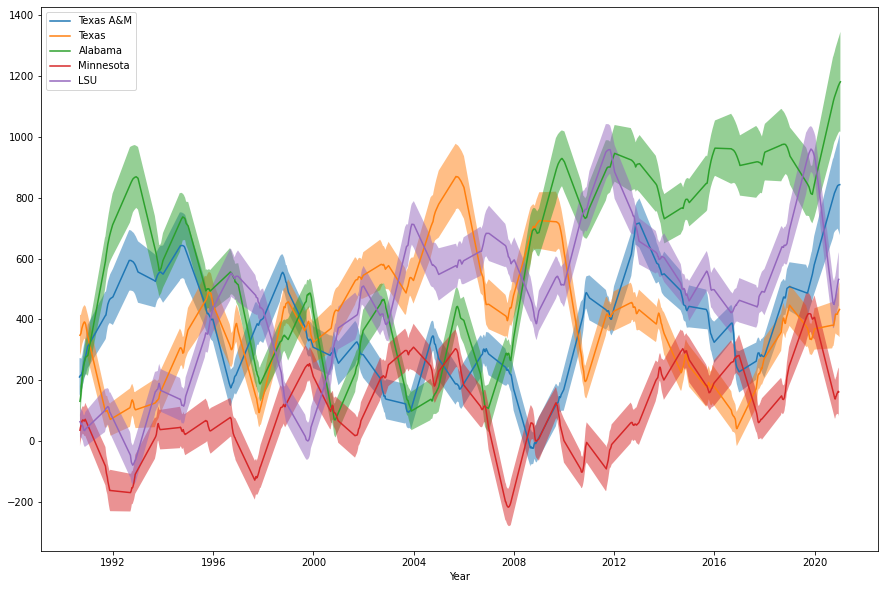

In [204]:
fig = plt.figure(figsize=[15,10])
for player in players:
    player_details = get_player_history(player,start_time=start_time)
    dates,ratings,uncertainties = list(zip(*player_details))
    ratings,uncertainties = np.asarray(ratings),np.asarray(uncertainties)
    plt.plot(dates,ratings,label=player)
    up,down = ratings+uncertainties, ratings-uncertainties
    plt.fill_between(dates,up,down, alpha=.5)
plt.legend()
plt.xlabel('Year')